# Project 2: Regression - 
# Factors that Contribute to A Movie's Overall Lifetime Gross


**Regression**
Lasso, Ridge, & Elastic net

**Goals**:
- Determine which factors have the highest impact on a movie's 'All Time Domestic Inflation Adjusted Box Office'

- Using our model, can we predict the 'All Time Domestic Inflation Adjusted Box Office' for these movies?

> No Time to Die (2020) - Financial Information 

> Tenet (2020) - Financial Information

----------------------------------------------------------------------------------------

### Use Beautiful Soup to Parse through from The Numbers "Top Domestic Lifetime Grosses":


Navigate to https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted


In [1]:
from __future__ import print_function, division

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import re
import io
import datetime
import dateutil.parser
import csv
import math

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Stats tools
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

# Plot tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Regression tools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
url = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted' 

response = requests.get(url)

The response we got back is an object that gives us access to:

response.text -- the returned HTML (if any) response.json -- the returned JSON (if any), typical for APIs response.status_code -- a code to tell you if your request was successful or if an error occurred, 2XX indicates success while 404 means not found

In [3]:
response.status_code  #200 = great success!

200

In [4]:
page = response.text

soup = BeautifulSoup(page,"lxml")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
  </script>
  <meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
  <!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="telephone=no" name="format-detection"/>
  <!-- for apple mobile -->
  <meta content="521546213" property="fb:admins"/>
  <meta content="initial-scale=1" name="viewport"/>
  <meta content="This char

***Scraping Tables***

Find the main table.

In [5]:
table = soup.find('table')
table

# yay tables!

<table>
<thead><tr>
<th>Rank</th>
<th>Released</th>
<th>Movie</th>
<th>Total Box Office</th>
</tr>
</thead>
<tbody>
<tr>
<td class="data">1</td>
<td class="data"><a href="/box-office-records/domestic/all-movies/cumulative/released-in-1977">1977</a></td>
<td><b><a href="/movie/Star-Wars-Ep-IV-A-New-Hope#tab=summary">Star Wars Ep. IV: A New Hope</a></b></td>
<td align="right">$1,497,057,186</td>
</tr>
<tr>
<td class="data">2</td>
<td class="data"><a href="/box-office-records/domestic/all-movies/cumulative/released-in-1997">1997</a></td>
<td><b><a href="/movie/Titanic-(1997)#tab=summary">Titanic</a></b></td>
<td align="right">$1,240,601,558</td>
</tr>
<tr>
<td class="data">3</td>
<td class="data"><a href="/box-office-records/domestic/all-movies/cumulative/released-in-1982">1982</a></td>
<td><b><a href="/movie/ET-The-Extra-Terrestrial#tab=summary">ET: The Extra-Terrestrial</a></b></td>
<td align="right">$1,224,582,698</td>
</tr>
<tr>
<td class="data">4</td>
<td class="data"><a href="/box-o

In [6]:
# Read first table from the html page into a dataframe
pd.read_html(str(table))[0]

,Rank,Released,Movie,Total Box Office
0,1,1977,Star Wars Ep. IV: A New Hope,"$1,497,057,186"
1,2,1997,Titanic,"$1,240,601,558"
2,3,1982,ET: The Extra-Terrestrial,"$1,224,582,698"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$1,006,872,847"
4,5,2009,Avatar,"$899,243,135"
5,6,1980,Star Wars Ep. V: The Empire Strikes Back,"$880,005,730"
6,7,2019,Avengers: Endgame,"$858,373,000"
7,8,1983,Star Wars Ep. VI: Return of the Jedi,"$847,248,129"
8,9,1993,Jurassic Park,"$836,866,856"
9,10,1994,The Lion King,"$827,550,405"


In [7]:
# Find all the links within this page's link
All_Movie_links = ['https://www.the-numbers.com' + x['href'] for x in table.find_all('a')]

In [8]:
# List out the first ten links on my page
All_Movie_links[0:10]

['https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/released-in-1977',
 'https://www.the-numbers.com/movie/Star-Wars-Ep-IV-A-New-Hope#tab=summary',
 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/released-in-1997',
 'https://www.the-numbers.com/movie/Titanic-(1997)#tab=summary',
 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/released-in-1982',
 'https://www.the-numbers.com/movie/ET-The-Extra-Terrestrial#tab=summary',
 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/released-in-2015',
 'https://www.the-numbers.com/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary',
 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/released-in-2009',
 'https://www.the-numbers.com/movie/Avatar#tab=summary']

In [9]:
# create a variable that saves just movie-specific links (#tab=summary pages)
my_movie_links = All_Movie_links[1::2]
# show me the first 5
my_movie_links[0:5]

['https://www.the-numbers.com/movie/Star-Wars-Ep-IV-A-New-Hope#tab=summary',
 'https://www.the-numbers.com/movie/Titanic-(1997)#tab=summary',
 'https://www.the-numbers.com/movie/ET-The-Extra-Terrestrial#tab=summary',
 'https://www.the-numbers.com/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary',
 'https://www.the-numbers.com/movie/Avatar#tab=summary']

In [10]:
# Define a function link_in_link that returns the contents of the links within the my_movie_links
# variable and store as a variable named lil_list
def link_in_link():
    link_list = []
    for mml in my_movie_links:
        url = mml
        response = requests.get(url)
        page = response.text

        soup = BeautifulSoup(page,"lxml")
        link_list.append(soup)
    return link_list

lil_list = link_in_link()

In [11]:
# Find our first movie title, this will be used as our index for the combined dataframe
lil_list[10].find('title').text

'Star Wars Ep. I: The Phantom Menace (1999) - Financial Information'

In [12]:
# For the 'Star Wars Ep. 4' (the 1st) link_in_link,
# return the tables which include Movie Detail info
Star_Wars_tables = lil_list[0].findAll('table')
Star_Wars_tables[4]

<table>
<meta content="1977-05-25" itemprop="dateCreated"/>
<tr><td><b>Domestic Releases:</b></td>
<td>May 25th, 1977 (Wide) by <a href="/market/distributor/20th-Century-Fox">20th Century Fox</a><br/>July 21st, 1978 (Wide) by <a href="/market/distributor/20th-Century-Fox">20th Century Fox</a><br/>August 15th, 1979 (Wide) by <a href="/market/distributor/20th-Century-Fox">20th Century Fox</a><br/>April 10th, 1981 (Wide) by <a href="/market/distributor/20th-Century-Fox">20th Century Fox</a><br/>August 13th, 1982 (Wide) by <a href="/market/distributor/20th-Century-Fox">20th Century Fox</a><br/>January 31st, 1997 (Wide) by <a href="/market/distributor/20th-Century-Fox">20th Century Fox</a></td></tr>
<tr><td><b><a href="#tab=video-sales">Video Release:</a></b></td>
<td>September 12th, 2006 by <a href="/home-market/distributor/Fox-Home-Entertainment">Fox Home Entertainment</a>, released as <i>Star Wars Episode IV - A New Hope (1977 &amp; 2004 versions)</i></td></tr>
<tr><td><b>MPAA Rating:</b

In [13]:
# Return 'Star Wars Ep. 4' Movie Details table as a dataframe 
pd.read_html(lil_list[0].find('td',string='Domestic Releases:').parent.parent.prettify())[0]

,0,1
0,Domestic Releases:,"May 25th, 1977 (Wide) by 20th Century Fox Ju..."
1,Video Release:,"September 12th, 2006 by Fox Home Entertainmen..."
2,MPAA Rating:,PG for sci-fi violence and brief mild language
3,Running Time:,119 minutes
4,Franchise:,Star Wars
5,Comparisons:,vs. Star Wars Ep. V: The Empire Strikes Back ...
6,Keywords:,Visual Effects
7,Source:,Original Screenplay
8,Genre:,Adventure
9,Production Method:,Live Action


In [14]:
# loop through our list of links and pull back all of our Movie Details tables               
list_of_mvdeets_dfs = []

for idx, lil in enumerate(lil_list):
        movie_finances_df = pd.read_html(lil.find('td',string='Domestic Releases:').parent.parent.prettify())[0]
        movie_finances_df['Title'] = lil.find('title').text
        list_of_mvdeets_dfs.append(movie_finances_df.pivot(index="Title",columns=0,values=1).reset_index())
        if idx > 100:
            break

In [15]:
# Return the 'Star Wars Ep. 4' Performance table as a dataframe 
pd.read_html(lil_list[0].findAll('table',id='movie_finances')[0].prettify())[0]

,0,1,2
0,Theatrical Performance,Theatrical Performance,Theatrical Performance
1,Domestic Box Office,"$460,998,007",Details
2,International Box Office,"$314,400,000",Details
3,Worldwide Box Office,"$775,398,007",NaN
4,Home Market Performance,Home Market Performance,Home Market Performance
5,Est. Domestic Blu-ray Sales,"$3,609,188",Details
6,Total Est. Domestic Video Sales,"$3,609,188",NaN
7,Further financial details...,Further financial details...,Further financial details...


In [16]:
# loop through our list of links and pull back all of our Performance tables
list_of_fin_dfs = []

for idx, lil in enumerate(lil_list):
    movie_finances_df = pd.read_html(lil.findAll('table',id='movie_finances')[0].prettify())[0]
    movie_finances_df['Title'] = lil.find('title').text # from 'lil_list[0].find('title').text'
    list_of_fin_dfs.append(movie_finances_df.pivot(index="Title",columns=0,values=1).reset_index())

In [17]:
# Read back the Metrics & Budget table in the 'Star Wars Ep. 4' site as a dataframe
pd.read_html(lil_list[0].find('td',string='Domestic Share:').parent.parent.prettify())[0]

,0,1
0,Opening Weekend:,"$1,554,475 (0.3% of total gross)"
1,Legs:,12.84 (domestic box office/biggest weekend)
2,Domestic Share:,59.5% (domestic box office/worldwide)
3,Production Budget:,"$11,000,000 (worldwide box office is 70.5 time..."
4,Theater counts:,"43 opening theaters/2,375 max. theaters, 18.4 ..."
5,Infl. Adj. Dom. BO,"$1,497,057,186"


In [18]:
# loop through our list of links and pull back all of our Metrics & Budget tables       
list_of_metrics_dfs = []

for idx, lil in enumerate(lil_list):
        movie_finances_df = pd.read_html(lil.find('td',string='Domestic Share:').parent.parent.prettify())[0]
        movie_finances_df['Title'] = lil.find('title').text
        list_of_metrics_dfs.append(movie_finances_df.pivot(index="Title",columns=0,values=1).reset_index())

In [19]:
list_of_mvdeets_dfs[0]

,Title,Comparisons:,Creative Type:,Domestic Releases:,Franchise:,Genre:,Keywords:,Languages:,MPAA Rating:,Production Companies:,Production Countries:,Production Method:,Running Time:,Source:,Video Release:
0,Star Wars Ep. IV: A New Hope (1977) - Financia...,vs. Star Wars Ep. V: The Empire Strikes Back ...,Science Fiction,"May 25th, 1977 (Wide) by 20th Century Fox Ju...",Star Wars,Adventure,Visual Effects,English,PG for sci-fi violence and brief mild language,20th Century Fox,United States,Live Action,119 minutes,Original Screenplay,"September 12th, 2006 by Fox Home Entertainmen..."


In [20]:
list_of_fin_dfs[0]

,Title,Domestic Box Office,Est. Domestic Blu-ray Sales,Further financial details...,Home Market Performance,International Box Office,Theatrical Performance,Total Est. Domestic Video Sales,Worldwide Box Office
0,Star Wars Ep. IV: A New Hope (1977) - Financia...,"$460,998,007","$3,609,188",Further financial details...,Home Market Performance,"$314,400,000",Theatrical Performance,"$3,609,188","$775,398,007"


In [21]:
list_of_metrics_dfs[0]

,Title,Domestic Share:,Infl. Adj. Dom. BO,Legs:,Opening Weekend:,Production Budget:,Theater counts:
0,Star Wars Ep. IV: A New Hope (1977) - Financia...,59.5% (domestic box office/worldwide),"$1,497,057,186",12.84 (domestic box office/biggest weekend),"$1,554,475 (0.3% of total gross)","$11,000,000 (worldwide box office is 70.5 time...","43 opening theaters/2,375 max. theaters, 18.4 ..."


**Great**, we have each of our dfs for our tables, we now have to join them together into 1 big df

In [22]:
play_df = (
    list_of_mvdeets_dfs[0]
    .append(list_of_mvdeets_dfs[1:])
    .set_index('Title')
    .join(
        list_of_fin_dfs[0]
        .append(list_of_fin_dfs[1:])
        .set_index('Title')
        .join(
            list_of_metrics_dfs[0]
            .append(list_of_metrics_dfs[1:])
            .set_index('Title')
    )
))

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [23]:
# Let's check out our df
play_df

,Comparisons:,Creative Type:,Domestic Releases:,Franchise:,Genre:,International Releases:,Keywords:,Languages:,MPAA Rating:,Production Companies:,Production Countries:,Production Method:,Running Time:,Source:,Video Release:,Domestic Box Office,Est. Domestic Blu-ray Sales,Est. Domestic DVD Sales,Further financial details...,Home Market Performance,International Box Office,Theatrical Performance,Total Est. Domestic Video Sales,Worldwide Box Office,Domestic Share:,Infl. Adj. Dom. BO,Legs:,Opening Weekend:,Production Budget:,Theater counts:
Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Star Wars Ep. IV: A New Hope (1977) - Financial Information,vs. Star Wars Ep. V: The Empire Strikes Back ...,Science Fiction,"May 25th, 1977 (Wide) by 20th Century Fox Ju...",Star Wars,Adventure,NaN,Visual Effects,English,PG for sci-fi violence and brief mild language,20th Century Fox,United States,Live Action,119 minutes,Original Screenplay,"September 12th, 2006 by Fox Home Entertainmen...","$460,998,007","$3,609,188",NaN,Further financial details...,Home Market Performance,"$314,400,000",Theatrical Performance,"$3,609,188","$775,398,007",59.5% (domestic box office/worldwide),"$1,497,057,186",12.84 (domestic box office/biggest weekend),"$1,554,475 (0.3% of total gross)","$11,000,000 (worldwide box office is 70.5 time...","43 opening theaters/2,375 max. theaters, 18.4 ..."
Titanic (1997) - Financial Information,All-Time Top-Grossing Films Best Picture Osca...,Historical Fiction,"December 19th, 1997 (Wide) by Paramount Pictu...",NaN,Thriller/Suspense,"February 20th, 1998 (Wide) ( South Korea ) ...","Visual Effects , Disaster , Cross-Class Ro...","English , Italian , Swedish",PG-13 for disaster related peril and violence...,"20th Century Fox , Paramount Pictures , Li...",United States,Live Action,194 minutes,Original Screenplay,"August 31st, 1999 by Paramount Home Video","$659,363,944",NaN,NaN,Further financial details...,NaN,"$1,548,844,451",Theatrical Performance,NaN,"$2,208,208,395",29.9% (domestic box office/worldwide),"$1,240,601,558",18.60 (domestic box office/biggest weekend),"$28,638,131 (4.3% of total gross)","$200,000,000 (worldwide box office is 11.0 tim...","2,674 opening theaters/3,265 max. theaters, 26..."
ET: The Extra-Terrestrial (1982) - Financial Information,vs. Star Wars Ep. III: Revenge of the Sith Cr...,Kids Fiction,"June 11th, 1982 (Wide) by Universal July 19t...",NaN,Drama,NaN,"Friendly Alien on Earth , First Contact",English,PG for language and mild thematic elements,Universal Pictures,United States,Live Action,114 minutes,Original Screenplay,"October 27th, 1988 by Universal Home Entertai...","$435,110,554",NaN,NaN,Further financial details...,NaN,"$357,854,772",Theatrical Performance,NaN,"$792,965,326",54.9% (domestic box office/worldwide),"$1,224,582,698",25.22 (domestic box office/biggest weekend),"$11,911,430 (2.7% of total gross)","$10,500,000 (worldwide box office is 75.5 time...","1,101 opening theaters/3,010 max. theaters, 20..."
Star Wars Ep. VII: The Force Awakens (2015) - Financial Information,"All-Time Top-Grossing Films Blockbusters, 201...",Science Fiction,"December 18th, 2015 (IMAX) by Walt Disney De...",Star Wars,Adventure,"December 16th, 2015 (Wide) ( Belgium ) Dece...","Space Opera , Good vs. Evil , Delayed Sequ...",English,PG-13 for sci-fi action violence. (Rating bu...,"Lucasfilm , Bad Robot",United States,Animation/Live Action,136 minutes,Original Screenplay,"April 1st, 2016 by Disney/Lucasfilm","$936,662,225","$151,627,543","$39,088,352",Further financial details...,Home Market Performance,"$1,131,561,399",Theatrical Performance,"$190,715,895","$2,068,223,624",45.3% (domestic box office/worldwide),"$1,006,872,847",3.78 (domestic box office/biggest weekend),"$247,966,675 (26.5% of total gross)","$306,000,000 (worldwide box office is 6.8 time...","4,134 opening theaters/4,134 max. theaters, 9...."
Avatar (2009) - Financial Information,"All-Time Top-Grossing Films Blockbusters, 200...",Science Fiction,"December 18th, 2

In [24]:
play_df.describe() 

,Comparisons:,Creative Type:,Domestic Releases:,Franchise:,Genre:,International Releases:,Keywords:,Languages:,MPAA Rating:,Production Companies:,Production Countries:,Production Method:,Running Time:,Source:,Video Release:,Domestic Box Office,Est. Domestic Blu-ray Sales,Est. Domestic DVD Sales,Further financial details...,Home Market Performance,International Box Office,Theatrical Performance,Total Est. Domestic Video Sales,Worldwide Box Office,Domestic Share:,Infl. Adj. Dom. BO,Legs:,Opening Weekend:,Production Budget:,Theater counts:
count,100,100,100,86,100,57,98,97,100,88,100,100,100,100,96,100,41,40,100,43,97,100,43,97,100,100,99,98,98,98
unique,93,7,100,46,7,57,95,8,82,59,5,4,58,10,95,100,41,40,1,1,97,1,43,97,89,100,92,98,96,98
top,vs. Star Wars Ep. IV: A New Hope Create your ...,Science Fiction,"July 7th, 2006 (Wide) by Walt Disney , relea...",Star Wars,Adventure,"May 29th, 2017 (Wide) ( South Korea ) May 3...",Visual Effects,English,PG,Lucasfilm,United States,Live Action,142 minutes,Original Screenplay,"May 13th, 2008 by Paramount Home Video","$219,195,051","$50,224,846","$19,187,407",Further financial details...,Home Market Performance,"$544,600,000",Theatrical Performance,"$96,024,465","$708,272,592",100.0% (domestic box office/worldwide),"$497,556,187",3.12 (domestic box office/biggest weekend),"$130,263,358 (27.7% of total gross)","$200,000,000 (worldwide box office is 5.3 time...","4,011 opening theaters/4,050 max. theaters, 6...."
freq,3,27,1,10,52,1,3,90,11,9,89,54,4,45,2,1,1,1,100,43,1,100,1,1,3,1,3,1,2,1


In [25]:
# How many rows, columns does the dataset have?
play_df.shape

(100, 30)

In [26]:
play_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Star Wars Ep. IV: A New Hope (1977) - Financial Information to Jaws 2 (1978) - Financial Information
Data columns (total 30 columns):
Comparisons:                       100 non-null object
Creative Type:                     100 non-null object
Domestic Releases:                 100 non-null object
Franchise:                         86 non-null object
Genre:                             100 non-null object
International Releases:            57 non-null object
Keywords:                          98 non-null object
Languages:                         97 non-null object
MPAA Rating:                       100 non-null object
Production Companies:              88 non-null object
Production Countries:              100 non-null object
Production Method:                 100 non-null object
Running Time:                      100 non-null object
Source:                            100 non-null object
Video Release:                     96 non-n

In [27]:
# Let's see which columns have the most values in descending order
play_df.apply(lambda x: x.count(), axis=0).sort_values(ascending=False)

Comparisons:                       100
Source:                            100
Creative Type:                     100
Infl. Adj. Dom. BO                 100
Domestic Share:                    100
Domestic Releases:                 100
Genre:                             100
Theatrical Performance             100
MPAA Rating:                       100
Further financial details...       100
Production Countries:              100
Production Method:                 100
Domestic Box Office                100
Running Time:                      100
Legs:                               99
Keywords:                           98
Theater counts:                     98
Production Budget:                  98
Opening Weekend:                    98
Languages:                          97
International Box Office            97
Worldwide Box Office                97
Video Release:                      96
Production Companies:               88
Franchise:                          86
International Releases:  

In [28]:
# null values along the row
play_df.isnull().sum(axis=1).sort_values(ascending=False).head(10)

Title
National Lampoon's Animal House (1978) - Financial Information       12
Smokey and the Bandit (1977) - Financial Information                 10
Tootsie (1982) - Financial Information                                9
Saturday Night Fever (1977) - Financial Information                   8
Close Encounters of the Third Kind (1977) - Financial Information     7
Crocodile Dundee (1986) - Financial Information                       7
Jaws 2 (1978) - Financial Information                                 7
Meet the Fockers (2004) - Financial Information                       7
Ghost (1990) - Financial Information                                  6
The Sixth Sense (1999) - Financial Information                        6
dtype: int64

In [29]:
# Let's look at our columns
play_df.columns

Index(['Comparisons:', 'Creative Type:', 'Domestic Releases:', 'Franchise:', 'Genre:', 'International Releases:', 'Keywords:', 'Languages:', 'MPAA Rating:', 'Production Companies:', 'Production Countries:', 'Production Method:', 'Running Time:', 'Source:', 'Video Release:', 'Domestic Box Office', 'Est. Domestic Blu-ray Sales', 'Est. Domestic DVD Sales', 'Further financial details...', 'Home Market Performance', 'International Box Office', 'Theatrical Performance', 'Total Est. Domestic Video Sales', 'Worldwide Box Office', 'Domestic Share:', 'Infl. Adj. Dom. BO', 'Legs:', 'Opening Weekend:', 'Production Budget:', 'Theater counts:'], dtype='object')

They look normal, right? **Wrong!!** Some of the data imported retained it's html format

In [30]:
#For example, 'Production Budget':
play_df.columns[-2]

'Production\xa0Budget:'

We'll rename these later and apply some formatting to the columns' values as well.

Just wanted to point that out for later

In [31]:
# Let's look at the content of these columns:
play_df[['Further financial details...','Theatrical Performance','Home Market Performance','Languages:']]

,Further financial details...,Theatrical Performance,Home Market Performance,Languages:
Title,,,,
Star Wars Ep. IV: A New Hope (1977) - Financial Information,Further financial details...,Theatrical Performance,Home Market Performance,English
Titanic (1997) - Financial Information,Further financial details...,Theatrical Performance,NaN,"English , Italian , Swedish"
ET: The Extra-Terrestrial (1982) - Financial Information,Further financial details...,Theatrical Performance,NaN,English
Star Wars Ep. VII: The Force Awakens (2015) - Financial Information,Further financial details...,Theatrical Performance,Home Market Performance,English
Avatar (2009) - Financial Information,Further financial details...,Theatrical Performance,Home Market Performance,"English , Na'vi"
Star Wars Ep. V: The Empire Strikes Back (1980) - Financial Information,Further financial details...,Theatrical Performance,Home Market Performance,English
Avengers: Endgame (2019) - Financial Information,Further financial details...,Theatrical Performance,Home Market Performance,English
Star Wars Ep. VI: Return of the Jedi (1983) - Financial Information,Further financial details...,Theatrical Performance,Home Market Performance,English
Jurassic Park (1993) - Financial Information,Further financial details...,Theatrical Performance,NaN,English


In [32]:
# Drop the columns above and save into a new df: play_df_2
play_df_2 = play_df.drop(['Further financial details...','Theatrical Performance',\
                          'Home Market Performance','Languages:'], axis=1)

In [33]:
play_df_2.head(2)

,Comparisons:,Creative Type:,Domestic Releases:,Franchise:,Genre:,International Releases:,Keywords:,MPAA Rating:,Production Companies:,Production Countries:,Production Method:,Running Time:,Source:,Video Release:,Domestic Box Office,Est. Domestic Blu-ray Sales,Est. Domestic DVD Sales,International Box Office,Total Est. Domestic Video Sales,Worldwide Box Office,Domestic Share:,Infl. Adj. Dom. BO,Legs:,Opening Weekend:,Production Budget:,Theater counts:
Title,,,,,,,,,,,,,,,,,,,,,,,,,,
Star Wars Ep. IV: A New Hope (1977) - Financial Information,vs. Star Wars Ep. V: The Empire Strikes Back ...,Science Fiction,"May 25th, 1977 (Wide) by 20th Century Fox Ju...",Star Wars,Adventure,NaN,Visual Effects,PG for sci-fi violence and brief mild language,20th Century Fox,United States,Live Action,119 minutes,Original Screenplay,"September 12th, 2006 by Fox Home Entertainmen...","$460,998,007","$3,609,188",NaN,"$314,400,000","$3,609,188","$775,398,007",59.5% (domestic box office/worldwide),"$1,497,057,186",12.84 (domestic box office/biggest weekend),"$1,554,475 (0.3% of total gross)","$11,000,000 (worldwide box office is 70.5 time...","43 opening theaters/2,375 max. theaters, 18.4 ..."
Titanic (1997) - Financial Information,All-Time Top-Grossing Films Best Picture Osca...,Historical Fiction,"December 19th, 1997 (Wide) by Paramount Pictu...",NaN,Thriller/Suspense,"February 20th, 1998 (Wide) ( South Korea ) ...","Visual Effects , Disaster , Cross-Class Ro...",PG-13 for disaster related peril and violence...,"20th Century Fox , Paramount Pictures , Li...",United States,Live Action,194 minutes,Original Screenplay,"August 31st, 1999 by Paramount Home Video","$659,363,944",NaN,NaN,"$1,548,844,451",NaN,"$2,208,208,395",29.9% (domestic box office/worldwide),"$1,240,601,558",18.60 (domestic box office/biggest weekend),"$28,638,131 (4.3% of total gross)","$200,000,000 (worldwide box office is 11.0 tim...","2,674 opening theaters/3,265 max. theaters, 26..."


In [34]:
# Python has issues parsing the : in the title names, so I'll remove them from the column names
play_df_2.columns=play_df_2.columns.str.replace(':','')

In [35]:
play_df_2.describe()

,Comparisons,Creative Type,Domestic Releases,Franchise,Genre,International Releases,Keywords,MPAA Rating,Production Companies,Production Countries,Production Method,Running Time,Source,Video Release,Domestic Box Office,Est. Domestic Blu-ray Sales,Est. Domestic DVD Sales,International Box Office,Total Est. Domestic Video Sales,Worldwide Box Office,Domestic Share,Infl. Adj. Dom. BO,Legs,Opening Weekend,Production Budget,Theater counts
count,100,100,100,86,100,57,98,100,88,100,100,100,100,96,100,41,40,97,43,97,100,100,99,98,98,98
unique,93,7,100,46,7,57,95,82,59,5,4,58,10,95,100,41,40,97,43,97,89,100,92,98,96,98
top,vs. Star Wars Ep. IV: A New Hope Create your ...,Science Fiction,"July 7th, 2006 (Wide) by Walt Disney , relea...",Star Wars,Adventure,"May 29th, 2017 (Wide) ( South Korea ) May 3...",Visual Effects,PG,Lucasfilm,United States,Live Action,142 minutes,Original Screenplay,"May 13th, 2008 by Paramount Home Video","$219,195,051","$50,224,846","$19,187,407","$544,600,000","$96,024,465","$708,272,592",100.0% (domestic box office/worldwide),"$497,556,187",3.12 (domestic box office/biggest weekend),"$130,263,358 (27.7% of total gross)","$200,000,000 (worldwide box office is 5.3 time...","4,011 opening theaters/4,050 max. theaters, 6...."
freq,3,27,1,10,52,1,3,11,9,89,54,4,45,2,1,1,1,1,1,1,3,1,3,1,2,1


In [36]:
# Fill NaNs with None - this will be become more apparent in the helper functions below
play_df_3 = play_df_2.fillna('None')
play_df_3

,Comparisons,Creative Type,Domestic Releases,Franchise,Genre,International Releases,Keywords,MPAA Rating,Production Companies,Production Countries,Production Method,Running Time,Source,Video Release,Domestic Box Office,Est. Domestic Blu-ray Sales,Est. Domestic DVD Sales,International Box Office,Total Est. Domestic Video Sales,Worldwide Box Office,Domestic Share,Infl. Adj. Dom. BO,Legs,Opening Weekend,Production Budget,Theater counts
Title,,,,,,,,,,,,,,,,,,,,,,,,,,
Star Wars Ep. IV: A New Hope (1977) - Financial Information,vs. Star Wars Ep. V: The Empire Strikes Back ...,Science Fiction,"May 25th, 1977 (Wide) by 20th Century Fox Ju...",Star Wars,Adventure,None,Visual Effects,PG for sci-fi violence and brief mild language,20th Century Fox,United States,Live Action,119 minutes,Original Screenplay,"September 12th, 2006 by Fox Home Entertainmen...","$460,998,007","$3,609,188",None,"$314,400,000","$3,609,188","$775,398,007",59.5% (domestic box office/worldwide),"$1,497,057,186",12.84 (domestic box office/biggest weekend),"$1,554,475 (0.3% of total gross)","$11,000,000 (worldwide box office is 70.5 time...","43 opening theaters/2,375 max. theaters, 18.4 ..."
Titanic (1997) - Financial Information,All-Time Top-Grossing Films Best Picture Osca...,Historical Fiction,"December 19th, 1997 (Wide) by Paramount Pictu...",None,Thriller/Suspense,"February 20th, 1998 (Wide) ( South Korea ) ...","Visual Effects , Disaster , Cross-Class Ro...",PG-13 for disaster related peril and violence...,"20th Century Fox , Paramount Pictures , Li...",United States,Live Action,194 minutes,Original Screenplay,"August 31st, 1999 by Paramount Home Video","$659,363,944",None,None,"$1,548,844,451",None,"$2,208,208,395",29.9% (domestic box office/worldwide),"$1,240,601,558",18.60 (domestic box office/biggest weekend),"$28,638,131 (4.3% of total gross)","$200,000,000 (worldwide box office is 11.0 tim...","2,674 opening theaters/3,265 max. theaters, 26..."
ET: The Extra-Terrestrial (1982) - Financial Information,vs. Star Wars Ep. III: Revenge of the Sith Cr...,Kids Fiction,"June 11th, 1982 (Wide) by Universal July 19t...",None,Drama,None,"Friendly Alien on Earth , First Contact",PG for language and mild thematic elements,Universal Pictures,United States,Live Action,114 minutes,Original Screenplay,"October 27th, 1988 by Universal Home Entertai...","$435,110,554",None,None,"$357,854,772",None,"$792,965,326",54.9% (domestic box office/worldwide),"$1,224,582,698",25.22 (domestic box office/biggest weekend),"$11,911,430 (2.7% of total gross)","$10,500,000 (worldwide box office is 75.5 time...","1,101 opening theaters/3,010 max. theaters, 20..."
Star Wars Ep. VII: The Force Awakens (2015) - Financial Information,"All-Time Top-Grossing Films Blockbusters, 201...",Science Fiction,"December 18th, 2015 (IMAX) by Walt Disney De...",Star Wars,Adventure,"December 16th, 2015 (Wide) ( Belgium ) Dece...","Space Opera , Good vs. Evil , Delayed Sequ...",PG-13 for sci-fi action violence. (Rating bu...,"Lucasfilm , Bad Robot",United States,Animation/Live Action,136 minutes,Original Screenplay,"April 1st, 2016 by Disney/Lucasfilm","$936,662,225","$151,627,543","$39,088,352","$1,131,561,399","$190,715,895","$2,068,223,624",45.3% (domestic box office/worldwide),"$1,006,872,847",3.78 (domestic box office/biggest weekend),"$247,966,675 (26.5% of total gross)","$306,000,000 (worldwide box office is 6.8 time...","4,134 opening theaters/4,134 max. theaters, 9...."
Avatar (2009) - Financial Information,"All-Time Top-Grossing Films Blockbusters, 200...",Science Fiction,"December 18th, 2009 (Wide) by 20th Century Fo...",Avatar,Action,"December 17th, 2009 (Wide) ( Australia ) De...","3-D , Invented Language , Visual Effects ...",PG-13 for intense epic battle sequences and w...,"Dune Entertainment , 20th Century Fox , In...",United States,Animation/Live Action,162 minutes,Original Screenplay,"April 22nd, 2010 by Fox Home Entertainment","$760,507,625","$164,882,662","$236,675,966","$2,029,197,650","

In [37]:
play_df_3.apply(lambda x: x.count(), axis=0).sort_values(ascending=False)

Theater counts                     100
Production Budget                  100
Creative Type                      100
Domestic Releases                  100
Franchise                          100
Genre                              100
International Releases             100
Keywords                           100
MPAA Rating                        100
Production Companies               100
Production Countries               100
Production Method                  100
Running Time                       100
Source                             100
Video Release                      100
Domestic Box Office                100
Est. Domestic Blu-ray Sales        100
Est. Domestic DVD Sales            100
International Box Office           100
Total Est. Domestic Video Sales    100
Worldwide Box Office               100
Domestic Share                     100
Infl. Adj. Dom. BO                 100
Legs                               100
Opening Weekend                    100
Comparisons              

Create helper functions to parse strings into appropriate data types

The returned values all need a bit of formatting before we can work with this data.  Here are a few helper functions.

In [38]:
# Example: $57,624,792 to 57624792
def convert_currency(val):
    if val == 'None':
        return 0
    elif val == 'NaN':
        return NaN
    else:
        new_val = val.replace(',','').replace('$', '')
        return int(new_val)

# Example: $357,115,007 (41.6% of total gross) to 357115007
def convert_curr_string(vals):
    if vals == 'None':
        return 0
    elif vals == 'NaN':
        return NaN
    else:
        match = re.findall('\$[0-9,]+',vals)[0] # this regex should match the string above
        curr_val = match.replace(',','').replace('$', '')
        return int(curr_val)

# Example: 116 minutes to 116
def runtime_to_minutes(runtimestring):
    if runtimestring == 'None':
        return 0
    elif runtimestring == 'NaN':
        return NaN
    runtimestring = str(runtimestring)
    runtimestring = runtimestring.replace(' ','').replace('minutes','')
    return int(runtimestring)

# Example: April 23rd, 2019 (Limited) (  China  )  April ... to 04-23-2019
def to_date(datestring):
    if datestring == 'None':
        return 0
    elif datestring == 'NaN':
        return NaN
    else:
        match = re.search('\w+\s\d{1,2}\w+,\s\d{4}',datestring).group(0)
        date = dateutil.parser.parse(match)
        return date
    
# Example: 4,662 opening theaters/4,662 max. theaters to 4662 or 
def to_count(counts):
    if counts == 'None':
        return 0
    elif counts == 'NaN':
        return NaN
    else:
        matches = counts.split(' ')[0].replace(',', '')
        return int(matches)

#### Grool
Let's change fix the values in some of our columns using the functions created above

In [39]:
# This will grab opening theaters #
play_df_3['Theater counts'] = play_df_3['Theater counts'].apply(lambda x: to_count(x))

In [40]:
play_df_3['Infl. Adj. Dom. BO'] = play_df_3['Infl. Adj. Dom. BO'].apply(lambda x: convert_currency(x))

In [41]:
play_df_3['Running Time']= play_df_3['Running Time'].apply(lambda x: runtime_to_minutes(x))

In [42]:
# Convert to_Date
play_df_3['Domestic Releases'] = play_df_3['Domestic Releases'].apply(to_date)

In [43]:
play_df_3['International Releases'] = play_df_3['International Releases'].apply(to_date)

In [44]:
# As mentioned before, certain columns still display html:
play_df_3.columns[13]

'Video\xa0Release'

In [45]:
play_df_3.columns[23]

'Opening\xa0Weekend'

In [46]:
play_df_3.columns[24]

'Production\xa0Budget'


Let's convert them to the appropriate data types and fix the names of these columns 


In [47]:
play_df_3['Video\xa0Release'] = play_df_3['Video\xa0Release'].apply(to_date)

In [48]:
play_df_3['Opening\xa0Weekend'] = play_df_3['Opening\xa0Weekend'].apply(lambda x: convert_curr_string(x))

In [49]:
play_df_3['Production\xa0Budget'] = play_df_3['Production\xa0Budget'].apply(lambda x: convert_curr_string(x))

In [50]:
# let's rename these 3 columns
play_df_3 = play_df_3.rename(columns={'Production\xa0Budget': 'Production Budget', 'Opening\xa0Weekend': 'Opening Weekend', 'Video\xa0Release': 'Video Release'})

In [51]:
# null values along the columns
np.logical_not(play_df_3.isnull()).sum().sort_values(ascending=False)

Theater counts                     100
Production Budget                  100
Creative Type                      100
Domestic Releases                  100
Franchise                          100
Genre                              100
International Releases             100
Keywords                           100
MPAA Rating                        100
Production Companies               100
Production Countries               100
Production Method                  100
Running Time                       100
Source                             100
Video Release                      100
Domestic Box Office                100
Est. Domestic Blu-ray Sales        100
Est. Domestic DVD Sales            100
International Box Office           100
Total Est. Domestic Video Sales    100
Worldwide Box Office               100
Domestic Share                     100
Infl. Adj. Dom. BO                 100
Legs                               100
Opening Weekend                    100
Comparisons              

In [52]:
# null values along the rows
play_df_3.isnull().sum(axis=1).sort_values(ascending=False).head(10)

Title
Jaws 2 (1978) - Financial Information                                           0
The Passion of the Christ (2004) - Financial Information                        0
Home Alone (1990) - Financial Information                                       0
Incredibles 2 (2018) - Financial Information                                    0
Pirates of the Caribbean: Dead Manâs Chest (2006) - Financial Information     0
Batman (1989) - Financial Information                                           0
Saturday Night Fever (1977) - Financial Information                             0
The Lord of the Rings: The Return of the King (2003) - Financial Information    0
Finding Nemo (2003) - Financial Information                                     0
Rogue One: A Star Wars Story (2016) - Financial Information                     0
dtype: int64

In [53]:
play_df_3

,Comparisons,Creative Type,Domestic Releases,Franchise,Genre,International Releases,Keywords,MPAA Rating,Production Companies,Production Countries,Production Method,Running Time,Source,Video Release,Domestic Box Office,Est. Domestic Blu-ray Sales,Est. Domestic DVD Sales,International Box Office,Total Est. Domestic Video Sales,Worldwide Box Office,Domestic Share,Infl. Adj. Dom. BO,Legs,Opening Weekend,Production Budget,Theater counts
Title,,,,,,,,,,,,,,,,,,,,,,,,,,
Star Wars Ep. IV: A New Hope (1977) - Financial Information,vs. Star Wars Ep. V: The Empire Strikes Back ...,Science Fiction,1977-05-25,Star Wars,Adventure,0,Visual Effects,PG for sci-fi violence and brief mild language,20th Century Fox,United States,Live Action,119,Original Screenplay,2006-09-12 00:00:00,"$460,998,007","$3,609,188",None,"$314,400,000","$3,609,188","$775,398,007",59.5% (domestic box office/worldwide),1497057186,12.84 (domestic box office/biggest weekend),1554475,11000000,43
Titanic (1997) - Financial Information,All-Time Top-Grossing Films Best Picture Osca...,Historical Fiction,1997-12-19,None,Thriller/Suspense,1998-02-20 00:00:00,"Visual Effects , Disaster , Cross-Class Ro...",PG-13 for disaster related peril and violence...,"20th Century Fox , Paramount Pictures , Li...",United States,Live Action,194,Original Screenplay,1999-08-31 00:00:00,"$659,363,944",None,None,"$1,548,844,451",None,"$2,208,208,395",29.9% (domestic box office/worldwide),1240601558,18.60 (domestic box office/biggest weekend),28638131,200000000,2674
ET: The Extra-Terrestrial (1982) - Financial Information,vs. Star Wars Ep. III: Revenge of the Sith Cr...,Kids Fiction,1982-06-11,None,Drama,0,"Friendly Alien on Earth , First Contact",PG for language and mild thematic elements,Universal Pictures,United States,Live Action,114,Original Screenplay,1988-10-27 00:00:00,"$435,110,554",None,None,"$357,854,772",None,"$792,965,326",54.9% (domestic box office/worldwide),1224582698,25.22 (domestic box office/biggest weekend),11911430,10500000,1101
Star Wars Ep. VII: The Force Awakens (2015) - Financial Information,"All-Time Top-Grossing Films Blockbusters, 201...",Science Fiction,2015-12-18,Star Wars,Adventure,2015-12-16 00:00:00,"Space Opera , Good vs. Evil , Delayed Sequ...",PG-13 for sci-fi action violence. (Rating bu...,"Lucasfilm , Bad Robot",United States,Animation/Live Action,136,Original Screenplay,2016-04-01 00:00:00,"$936,662,225","$151,627,543","$39,088,352","$1,131,561,399","$190,715,895","$2,068,223,624",45.3% (domestic box office/worldwide),1006872847,3.78 (domestic box office/biggest weekend),247966675,306000000,4134
Avatar (2009) - Financial Information,"All-Time Top-Grossing Films Blockbusters, 200...",Science Fiction,2009-12-18,Avatar,Action,2009-12-17 00:00:00,"3-D , Invented Language , Visual Effects ...",PG-13 for intense epic battle sequences and w...,"Dune Entertainment , 20th Century Fox , In...",United States,Animation/Live Action,162,Original Screenplay,2010-04-22 00:00:00,"$760,507,625","$164,882,662","$236,675,966","$2,029,197,650","$401,558,628","$2,789,705,275",27.3% (domestic box office/worldwide),899243135,9.87 (domestic box office/biggest weekend),77025481,237000000,3452
Star Wars Ep. V: The Empire Strikes Back (1980) - Financial Information,vs. Star Wars Ep. IV: A New Hope Create your ...,Science Fiction,1980-05-21,Star Wars,Adventure,1980-05-20 00:00:00,Visual Effects,PG for sci-fi action violence,Lucasfilm,United States,Live Action,124,Original Screenplay,2006-09-12 00:00:00,"$290,271,960","$2,437,567",None,"$257,697,044","$2,437,567","$547,969,004",53.0% (domestic box office/worldwide),880005730,13.21 (domestic box office/biggest weekend),4910483,23000000,126
Avengers: Endgame (2019) - Financial Information,"All-Time Top-Grossing Films Blockbusters, 201...",Super Hero,2019-04-26,Marvel Cinematic Universe Avengers,Action,2019-04-23 00:00:00,"Ensemble , Marvel Comics , Animal Lead , ...",PG-13 for sequences of sci-fi violence and ac...,Marvel Studios,United St

In [54]:
# Add year and month columns based on the date the movies were released
play_df_3['year'] = pd.DatetimeIndex(play_df_3['Domestic Releases']).year
play_df_3['month'] = pd.DatetimeIndex(play_df_3['Domestic Releases']).month

In [55]:
# Create a new df for the columns we will analyze with EDA and LR
play_df_4 = play_df_3[['Franchise', 'Genre','Running Time','Infl. Adj. Dom. BO','Opening Weekend', 'Production Budget', 'Theater counts', 'year', 'month']]

In [56]:
# Apply booleans (0 or 1) for Franchise column
play_df_4['Franchise'] = play_df_4['Franchise'].apply(lambda x: 0 if (x =='None') else 1)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
# Create a dummy df for our genres
play_df_4 = pd.get_dummies(play_df_4,columns=['Genre'],drop_first=True)

In [58]:
play_df_4

,Franchise,Running Time,Infl. Adj. Dom. BO,Opening Weekend,Production Budget,Theater counts,year,month,Genre_Adventure,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Musical,Genre_Thriller/Suspense
Title,,,,,,,,,,,,,,
Star Wars Ep. IV: A New Hope (1977) - Financial Information,1,119,1497057186,1554475,11000000,43,1977,5,1,0,0,0,0,0
Titanic (1997) - Financial Information,0,194,1240601558,28638131,200000000,2674,1997,12,0,0,0,0,0,1
ET: The Extra-Terrestrial (1982) - Financial Information,0,114,1224582698,11911430,10500000,1101,1982,6,0,0,1,0,0,0
Star Wars Ep. VII: The Force Awakens (2015) - Financial Information,1,136,1006872847,247966675,306000000,4134,2015,12,1,0,0,0,0,0
Avatar (2009) - Financial Information,1,162,899243135,77025481,237000000,3452,2009,12,0,0,0,0,0,0
Star Wars Ep. V: The Empire Strikes Back (1980) - Financial Information,1,124,880005730,4910483,23000000,126,1980,5,1,0,0,0,0,0
Avengers: Endgame (2019) - Financial Information,1,181,858373000,357115007,400000000,4662,2019,4,0,0,0,0,0,0
Star Wars Ep. VI: Return of the Jedi (1983) - Financial Information,1,133,847248129,23019618,32500000,1002,1983,5,1,0,0,0,0,0
Jurassic Park (1993) - Financial Information,1,126,836866856,50159460,63000000,2404,1993,6,0,0,0,0,0,0


Let's start plotting some features against Infl. Adj. Dom. BO (our Y)

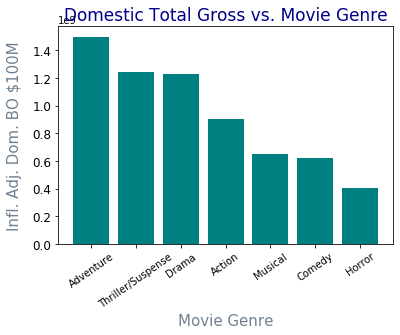

<Figure size 720x2160 with 0 Axes>

In [59]:
# Plot 'Infl. Adj. Dom. BO' compared to Genre
# Bar chart with Genre on the x axis and Domestic Total Gross on the y axis
plt.bar(play_df_3['Genre'], play_df_3['Infl. Adj. Dom. BO'], color='teal');

# plot prettiness
plt.title('Domestic Total Gross vs. Movie Genre', fontsize=17, color='darkblue')
plt.xticks(rotation=35, fontsize=10)
plt.yticks(rotation='horizontal', fontsize=12)
plt.ylabel('Infl. Adj. Dom. BO $100M', fontsize=15, labelpad=10, color='slategrey')
plt.xlabel('Movie Genre', fontsize=15, color='slategrey');
plt.figure(figsize=(10,30));


Looks like Adventure, Thriller/Suspense, and Drama are our top generes
We'll later see how this compares to LR

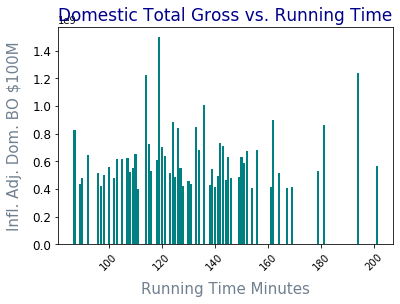

<Figure size 720x2160 with 0 Axes>

In [60]:
# Plot top Infl. Adj. Dom. BO compared to Running Time
# Bar chart with the Runtime on x axis and the Domestic Total Gross for the top 10 movies on the y axis
play_df_4.sort_values('Infl. Adj. Dom. BO', ascending=True);
plt.bar(play_df_4['Running Time'], play_df_4['Infl. Adj. Dom. BO'], color='teal');

# plot prettiness
plt.title('Domestic Total Gross vs. Running Time', fontsize=17, color='darkblue')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation='horizontal', fontsize=12)
plt.ylabel('Infl. Adj. Dom. BO $100M', fontsize=15, labelpad=10, color='slategrey')
plt.xlabel('Running Time Minutes', fontsize=15, labelpad=10, color='slategrey');
plt.figure(figsize=(10,30));

Biggest spikes are ~ 2 and 3 hours

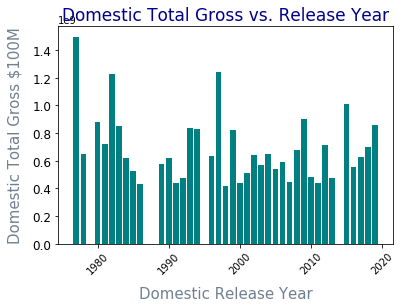

<Figure size 720x2160 with 0 Axes>

In [61]:
# Plot domestic total gross compared to Domestic Release Year
# Creating a plot with the year on x axis and the Domestic Total Gross on the y axis
play_df_4.sort_values('year', ascending=True);
plt.bar(play_df_4['year'], play_df_4['Infl. Adj. Dom. BO'], color='teal');

# plot prettiness
plt.title('Domestic Total Gross vs. Release Year', fontsize=17, color='darkblue')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation='horizontal', fontsize=12)
plt.ylabel('Domestic Total Gross $100M', fontsize=15, labelpad=10, color='slategrey')
plt.xlabel('Domestic Release Year', fontsize=15, labelpad=10, color='slategrey');
plt.figure(figsize=(10,30));

We can see spikes for our top 3 movies:
1. Star Wars: Episode IV - A New Hope - 1977
2. Titanic - 1997
3. E.T. the Extra-Terrestrial - 1982

In [62]:
# Mean domestic total gross by month
month_mean_DTG = play_df_4.groupby('month')['month','Infl. Adj. Dom. BO'].mean()
month_mean_DTG

,month,Infl. Adj. Dom. BO
month,,
2,2.0,6.219853e+08
3,3.0,4.685558e+08
4,4.0,7.685942e+08
5,5.0,5.694607e+08
6,6.0,5.936374e+08
7,7.0,5.199254e+08
8,8.0,4.645983e+08
9,9.0,4.235554e+08
11,11.0,4.856878e+08


It appears movies released in April are the most profitable. February, June, and December also appear to be fairly profitable.

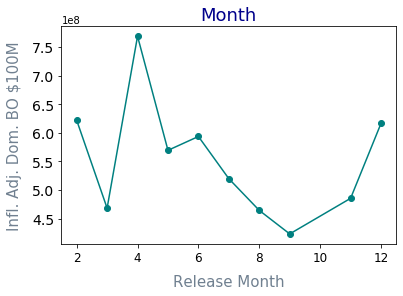

In [63]:
# Create a plot with Date Movie Released Month on the x axis and Infl. Adj. Dom. BO on the y axis
plt.plot(month_mean_DTG['month'], month_mean_DTG['Infl. Adj. Dom. BO'], linestyle = 'solid', color='teal', marker ='o');

# plot prettines
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(rotation='horizontal', fontsize=14)
plt.title('Month', fontsize=18, color='darkblue')
plt.ylabel('Infl. Adj. Dom. BO $100M', fontsize=15, labelpad=10, color='slategrey')
plt.xlabel('Release Month', fontsize=15, labelpad=10, color='slategrey');

**Visualizing with Seaborn**

Let's use pandas to check out the correlations between the different variables.

In [64]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

## Let's see which features have outliers:

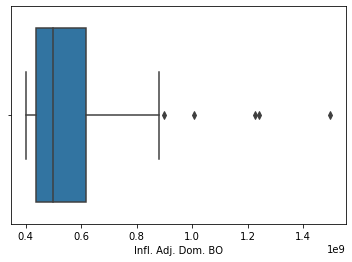

In [65]:
sns.boxplot(x=play_df_4['Infl. Adj. Dom. BO'])

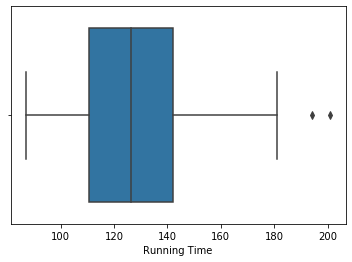

In [66]:
sns.boxplot(x=play_df_4['Running Time'])

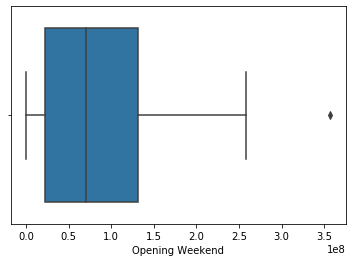

In [67]:
sns.boxplot(x=play_df_4['Opening Weekend'])

* Remove outliers and create a new dataframe:

In [68]:
#import necessary modules:
from scipy import stats

# For each column, first, compute the Z-score of each value in the column, relative to the column mean and standard deviation.
# Then, take the absolute of Z-score because the direction does not matter, only if it is below the threshold.
# all(axis=1) ensures that for each row, all columns satisfy the constraint.
# The result of this condition is used to index the dataframe.
play_df_5 = play_df_4[(np.abs(stats.zscore(play_df_4)) < 3).all(axis=1)]

In [69]:
play_df_5.corr()

,Franchise,Running Time,Infl. Adj. Dom. BO,Opening Weekend,Production Budget,Theater counts,year,month,Genre_Adventure,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Musical,Genre_Thriller/Suspense
Franchise,1.000000,0.197232,0.027707,0.275468,0.239834,0.361107,0.279049,-0.197134,-0.033725,NaN,NaN,NaN,NaN,NaN
Running Time,0.197232,1.000000,0.055801,0.263516,0.351181,0.278214,0.118592,0.213589,-0.252478,NaN,NaN,NaN,NaN,NaN
Infl. Adj. Dom. BO,0.027707,0.055801,1.000000,0.079744,-0.010489,-0.262070,-0.198167,-0.023523,-0.018159,NaN,NaN,NaN,NaN,NaN
Opening Weekend,0.275468,0.263516,0.079744,1.000000,0.830010,0.791294,0.823395,-0.122106,-0.257198,NaN,NaN,NaN,NaN,NaN
Production Budget,0.239834,0.351181,-0.010489,0.830010,1.000000,0.735563,0.783302,-0.047207,-0.242755,NaN,NaN,NaN,NaN,NaN
Theater counts,0.361107,0.278214,-0.262070,0.791294,0.735563,1.000000,0.869339,-0.105701,-0.176507,NaN,NaN,NaN,NaN,NaN
year,0.279049,0.118592,-0.198167,0.823395,0.783302,0.869339,1.000000,-0.002356,-0.193393,NaN,NaN,NaN,NaN,NaN
month,-0.197134,0.213589,-0.023523,-0.122106,-0.047207,-0.105701,-0.002356,1.000000,0.370931,NaN,NaN,NaN,NaN,NaN
Genre_Adventure,-0.033725,-0.252478,-0.018159,-0.257198,-0.242755,-0.176507,-0.193393,0.370931,1.000000,NaN,NaN,NaN,NaN,NaN
Genre_Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


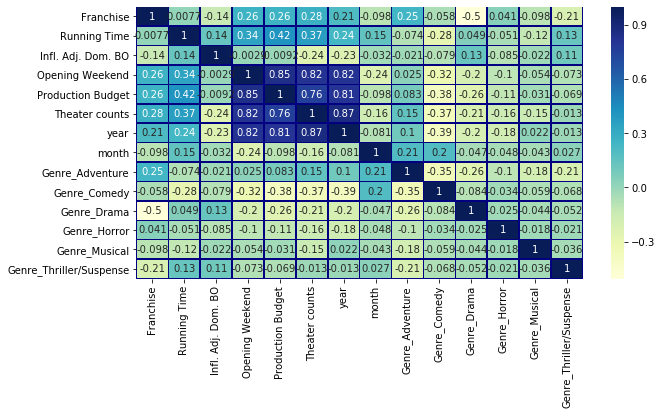

In [70]:
# example of a better corr matrix with heatmap
plt.figure(figsize=(10,5))
sns.heatmap(play_df_4.corr(), cmap="YlGnBu", annot=True, linewidths=.5, linecolor="navy");
# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

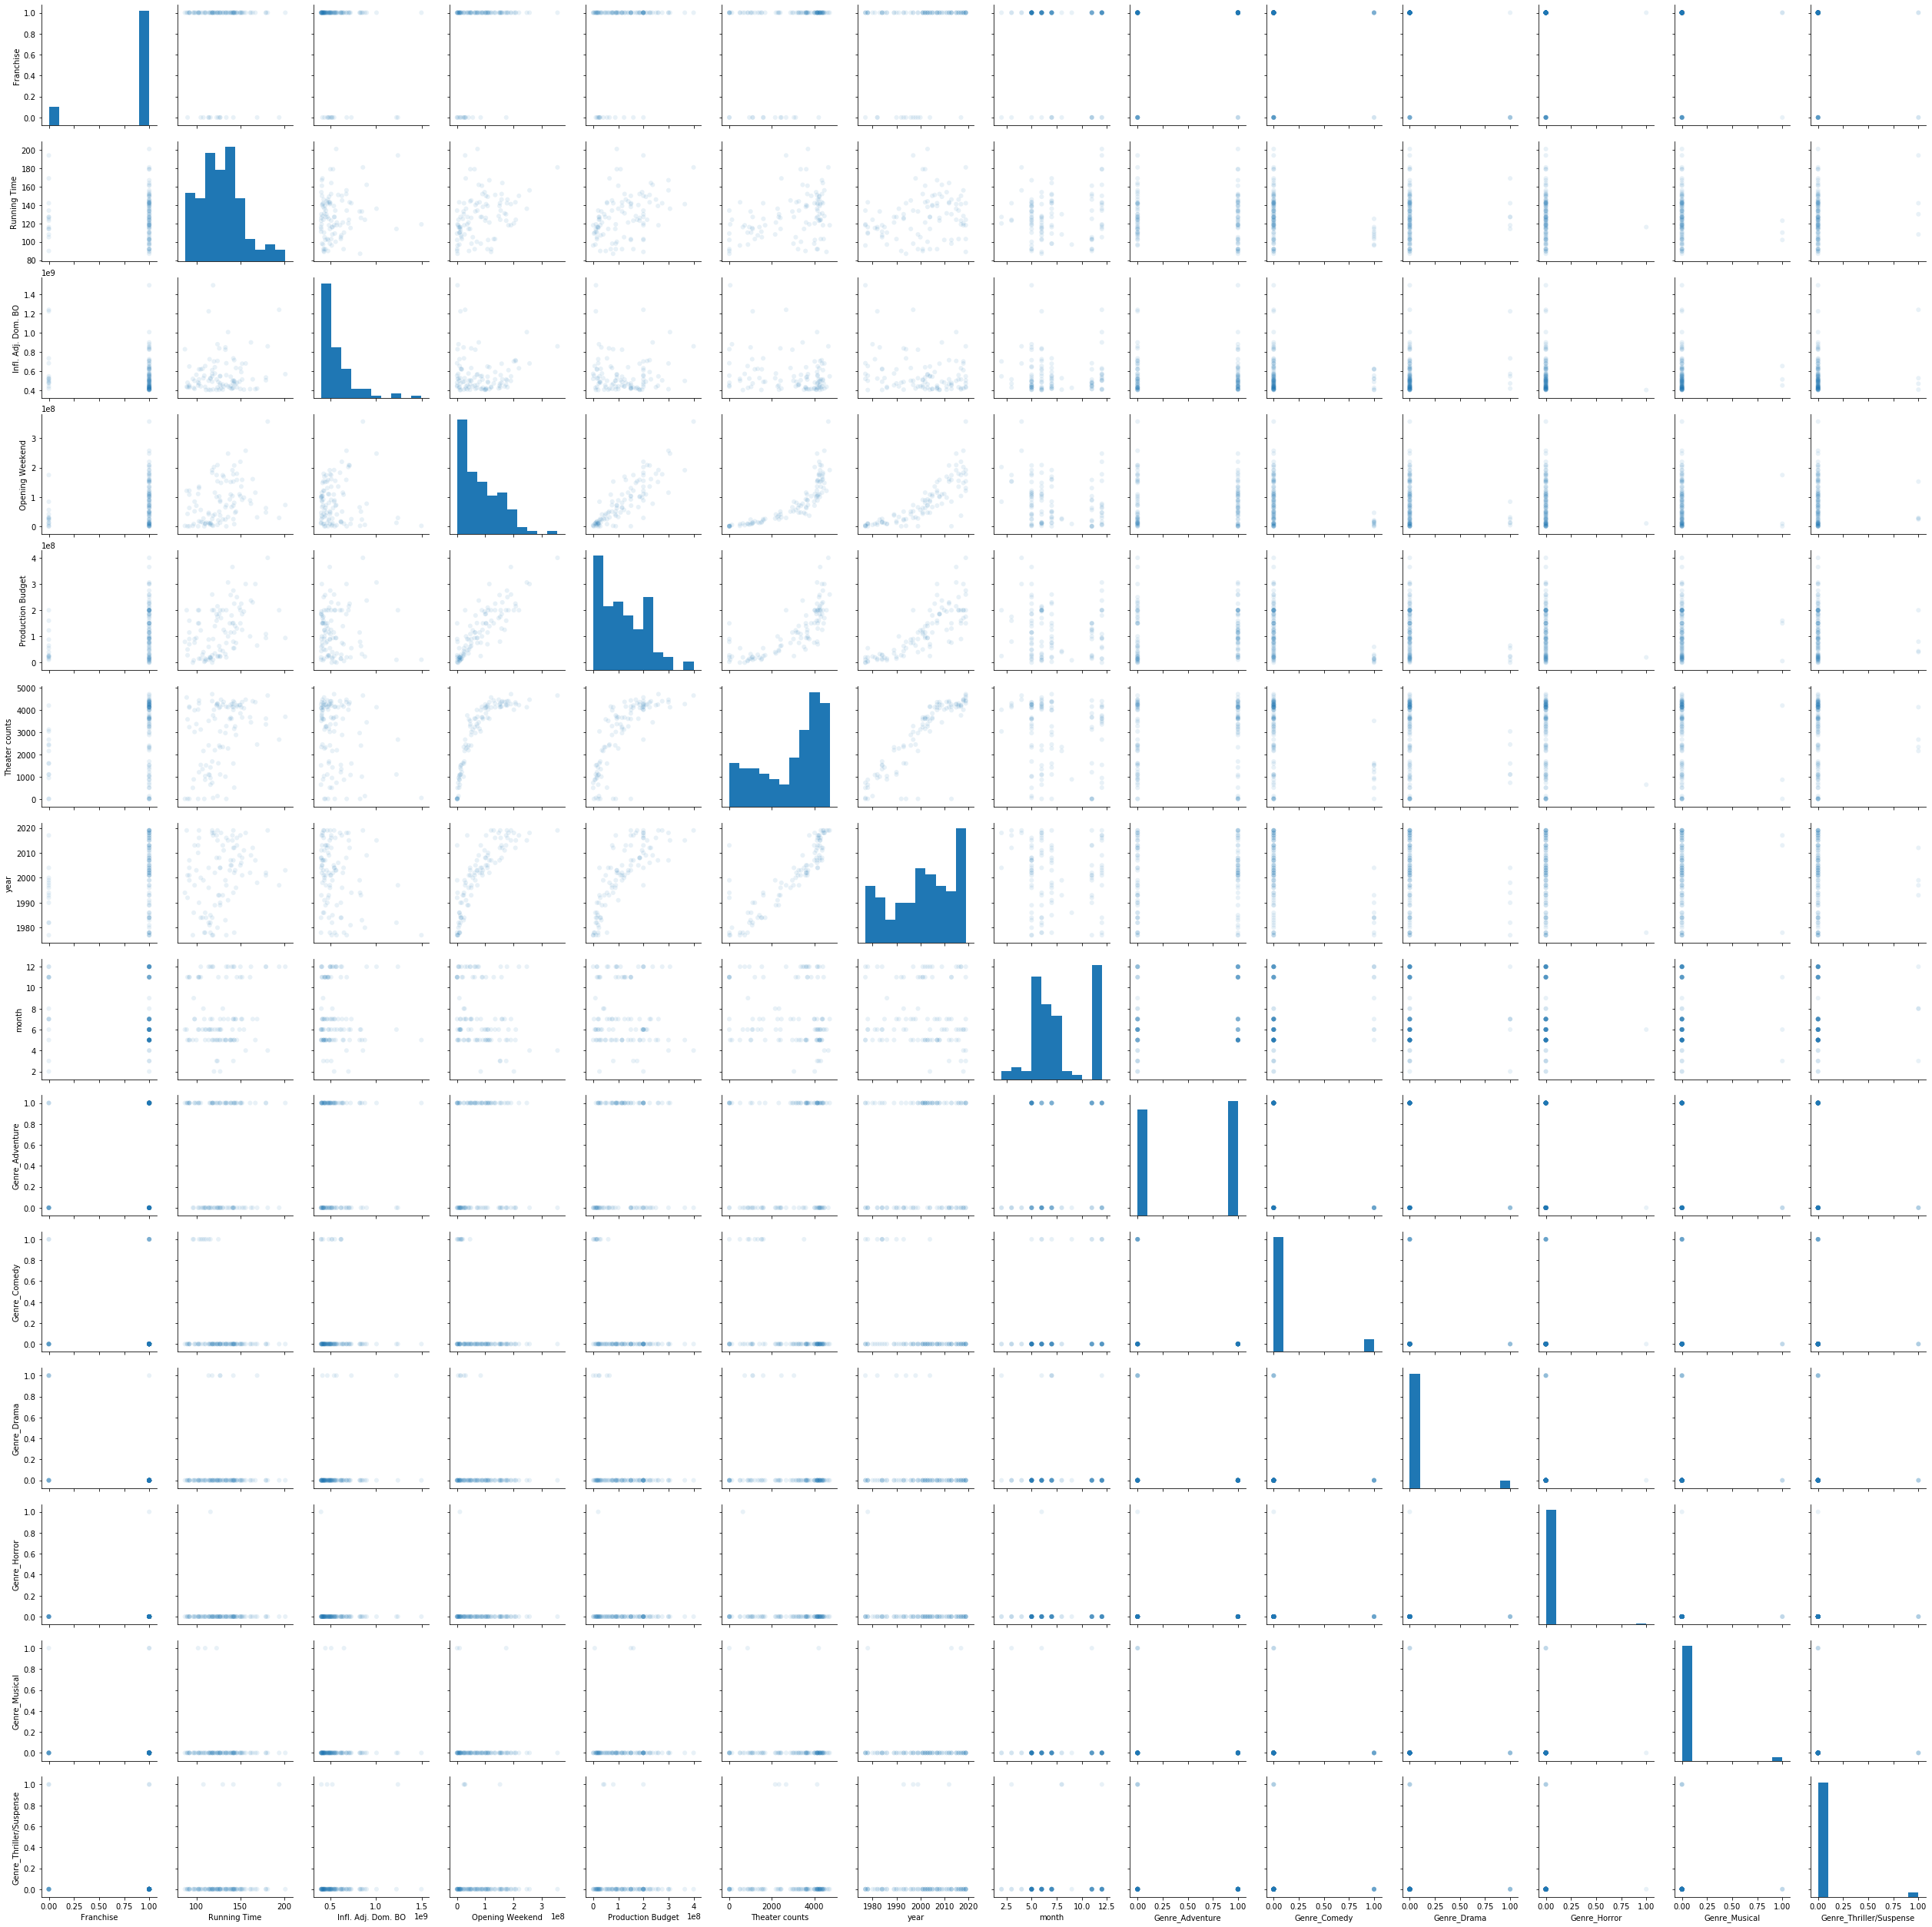

In [71]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(play_df_4, palette="husl", plot_kws=dict(alpha=.1, edgecolor='none')); 

### Correlation and Multicollinearity

We notice that some of the variables are highly correlated. 

In the extreme case, when 2 predictors are perfectly correlated then there is absolutely nothing gained by making both variables part of our regression.

The other takeaway from this table is that some of our predictors are fairly correlated with our *target variable Y*.  This is good, it means that these are the variables that we most likely want to include as part of our model as they explain a large amount of the variance in the target variable (correlation=R, variance_explained=R<sup>2</sup>).

Let's try to visualize these correlations all together by using the *seaborn pairplot* function.

## Which features have high multicollinearity?

    - Genre_Horror

# Regression with sklearn

In [72]:
# Our y is 'Infl. Adj. Dom. BO', our X is the rest of the columns
X = play_df_5.drop('Infl. Adj. Dom. BO',axis=1)
y = play_df_5['Infl. Adj. Dom. BO']

In [73]:
X,y = np.array(X),np.array(y)

In [74]:
# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
print("R^2:")
print(lr.score(X,y))

R^2:
0.33652120293066723


Ideally, we want R^2 to be closer to 1.0.

In [75]:
# Estimated coefficients for the linear regression problem.
lr.coef_

array([ 8.45052274e+07,  1.95807962e+05,  1.91239593e+00,  5.87957059e-02,
       -7.85108937e+04, -4.46105236e+06,  9.75009809e+05,  7.64473662e+06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [76]:
# Independent term in the linear model.
lr.intercept_

9428974464.585861

In [77]:
# Rank of matrix X. Only available when X is dense.
lr.rank_

8

In [78]:
# Singular values of X. Only available when X is dense.
lr.singular_

array([8.44781104e+08, 2.50834710e+08, 6.61748218e+03, 1.77691873e+02,
       3.89660636e+01, 2.06696002e+01, 3.27225198e+00, 1.71449180e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

## Simple Validation Method: Train / Validation / Test

Here we will break the data into 3 portions: 60% for training, 20% for validation (used to select the model), 20% for final testing evaluation.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary LR with Ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = play_df_5.drop('Infl. Adj. Dom. BO',axis=1)
y = play_df_5['Infl. Adj. Dom. BO']

# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

---
Using `train_test_split` and random state 3, further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).

---

In [80]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=.25, random_state=42)

Now we need some model setup: **when using regularization, we must standardize** the data so that all features are on the same scale (we subtract the mean of each column and divide by the standard deviation, giving us features with mean 0 and std 1). Since this scaling is part of our model, we need to scale using the training set feature distributions and apply the same scaling to validation and test without refitting the scaler. 

Also, we need to get **polynomial features** for the poly model

In [81]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1) 

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

Now we can train, validate, and test.

In [82]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.435
Ridge Regression val R^2: 0.421
Degree 2 polynomial regression val R^2: 0.559


So having run this validation step, we see that the evidence points to degree 2 polynomial as the best model.

Our validation process lets us choose that, and as our final step we retrain it on the entire chunk of train/val data and see how it does on test data:  

In [83]:
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Degree 2 polynomial regression val R^2: 0.559


---

Return to the beginning of this workflow (train-test split), change the random_state values to see how it impacts the model.

Random_state is the seed of the pseudo random number generator to use when shuffling the data.
       
---

In [84]:
X = play_df_5.drop('Infl. Adj. Dom. BO',axis=1)
y = play_df_5['Infl. Adj. Dom. BO']

In [85]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=.25, random_state=6)

In [86]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1) # Changed from the default alpha=1

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [87]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.551
Ridge Regression val R^2: 0.539
Degree 2 polynomial regression val R^2: 0.345


* random_state at 16 helped our Linear and Ridge Regression scores, but our degree 2 polynomial regression dropped .237

### Rigorous Validation Method: Cross-Validation / Test

Here we will break the data into 2 portions: 80% for a cross-validated training process, and 20% for final testing evaluation. 

We'll focus on linear regression and ridge regression (we also can feel pretty comfortable throwing out the full degree 2 polynomial regression based on the poor results above.) 

As we loop through our CV folds, we will train and validate both models and collect the results to compare at the end. Note that we scale the training features within the CV loop.

In [88]:
from sklearn.model_selection import KFold

X = play_df_5.drop('Infl. Adj. Dom. BO',axis=1)
y = play_df_5['Infl. Adj. Dom. BO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=71) 

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [89]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 42)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_tr, y_tr = X[train_ind], y[train_ind]
    X_te, y_te = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.49734047034831413, 0.49734047034831413, 0.49734047034831413, 0.49734047034831413, 0.49734047034831413]
Ridge scores:  [0.48628294320160603, 0.48628294320160603, 0.48628294320160603, 0.48628294320160603, 0.48628294320160603] 

Simple mean cv r^2: 0.497 +- 0.000
Ridge mean cv r^2: 0.486 +- 0.000


*Since k-fold is more reliable than a single validation set, we select the ridge regression model.*

# Feature engineering with linear regression

In [90]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We will set out to improve on a baseline set of features via **feature engineering**.      

We will split our data into training and validation sets, build models on various feature sets and compare their results on the validation set. We will use visual exploration, domain understanding, and intuition to construct new features that add significant predictive signal, which will be apparent in validation *r-squared* scores.

## Simple EDA and Baseline Model


#### Setting up for modeling and building a baseline:

In [91]:
#Separate our features from our target
X = play_df_5.drop('Infl. Adj. Dom. BO',axis=1)
y = play_df_5['Infl. Adj. Dom. BO']

Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model. 

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward. 

In [92]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # Create 4 sets of data
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=11) # split 80/20  => test_size= 0.2; random_state, b/c we're doing it multiple times
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train) # X-train and y_train are 80% of our data; fit = extracting parameters from our model
    
    # score fit model on validation data  
    val_score = lr_model.score(X_val, y_val) # input model run .score and give it validation data
    
    # Another option for score fit model on validation data
#     preds = lr_model.predict(X_val)
#     metrics.r2_score(preds, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.

In [93]:
split_and_validate(X, y) # fit our model and print our info


Validation R^2 score was: 0.6469152114693417
Feature coefficient results: 

Franchise : 87603138.84
Running Time : 88945.69
Opening Weekend : 1.85
Production Budget : 0.08
Theater counts : -67546.51
year : -5132394.08
month : 590077.73
Genre_Adventure : -7368215.17
Genre_Comedy : 0.00
Genre_Drama : 0.00
Genre_Horror : 0.00
Genre_Musical : 0.00
Genre_Thriller/Suspense : 0.00


*What can I derive from these coefficient results? Our model appears to be somewhat confident at ~65%

Theater counts, year, & Genre_Adventure have a negative impact on overall lifetime gross.

## Basic feature engineering: adding interaction terms

There may easily be **interaction effects** present, in which the impact of one feature may be dependent on the current value of a different feature.

There is a relationship between Running Time and Opening Weekend and Running Time and Theater counts.

In [94]:
X2 = X.copy()

In [95]:
X2.columns

Index(['Franchise', 'Running Time', 'Opening Weekend', 'Production Budget', 'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy', 'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense'], dtype='object')

In [96]:
# multiplication interaction
X2['RT_x_OW'] = X2['Running Time'] * X2['Opening Weekend']
X2['RT_x_TC'] = X2['Running Time'] * X2['Theater counts']

split_and_validate(X2, y)


Validation R^2 score was: 0.691192525307141
Feature coefficient results: 

Franchise : 75424772.68
Running Time : 1631044.69
Opening Weekend : 3.99
Production Budget : 0.13
Theater counts : -77259.90
year : -4372095.36
month : 313632.01
Genre_Adventure : -9068403.89
Genre_Comedy : -0.00
Genre_Drama : 0.00
Genre_Horror : 0.00
Genre_Musical : 0.00
Genre_Thriller/Suspense : 0.00
RT_x_OW : -0.02
RT_x_TC : -63.38


With this version of our model, which is ~69% confident vs. ~65% from earlier, we still see Theater counts, year, & Genre_Adventure have a negative impact on overall lifetime gross. 

## Regularized Linear Regression Applied to the Numbers

In [355]:
%pylab inline
#% config InlineBackend.figure_format = 'svg'

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


In [365]:
#Separate our features from our target
X = play_df_5.drop('Infl. Adj. Dom. BO',axis=1)
y = play_df_5['Infl. Adj. Dom. BO']

In [366]:
play_df_5.columns

Index(['Franchise', 'Running Time', 'Infl. Adj. Dom. BO', 'Opening Weekend', 'Production Budget', 'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy', 'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense'], dtype='object')

In [367]:
# create Opening Weekend squared term, which we expect to 
# help based on the relationship we see in the pair plot 
X['OW2'] = X['Opening Weekend'] ** 2  #.657

In [368]:
#Split the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [369]:
X_train.columns

Index(['Franchise', 'Running Time', 'Opening Weekend', 'Production Budget', 'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy', 'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense', 'OW2'], dtype='object')

In [370]:
X_train.shape

(43, 14)

In [371]:
X_val.shape

(15, 14)

In [372]:
X_test.shape

(15, 14)

In [373]:
split_and_validate(X, y)


Validation R^2 score was: 0.6574519336544152
Feature coefficient results: 

Franchise : 25480.77
Running Time : 409393.06
Opening Weekend : 1.02
Production Budget : 0.02
Theater counts : -53011.74
year : -4666328.90
month : -1624951.36
Genre_Adventure : -31605.88
Genre_Comedy : 0.00
Genre_Drama : 0.00
Genre_Horror : 0.00
Genre_Musical : 0.00
Genre_Thriller/Suspense : 0.00
OW2 : 0.00


## Exploring the Behavior of LASSO vs. Ridge Regularization

Here we will penalize our coefficients, because it forces a variable to be "worth it" in order to have a particularly extreme coefficient or even one that's greater than zero.  

In **LASSO**, we penalize the sum of the absolute values of the coefficients and in **Ridge Regression** we penalize the sum of the squares of the coefficients. Which one works better depends on the data and the business needs of the model.

In [374]:
selected_columns = ['Franchise', 'Running Time', 'Opening Weekend', 'Production Budget', 'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy', 'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense'] 

In [375]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, Pirates of the Caribbean: At Worldâs End (2007) - Financial Information to Star Wars Ep. II: Attack of the Clones (2002) - Financial Information
Data columns (total 14 columns):
Franchise                  43 non-null int64
Running Time               43 non-null int64
Opening Weekend            43 non-null int64
Production Budget          43 non-null int64
Theater counts             43 non-null int64
year                       43 non-null int64
month                      43 non-null int64
Genre_Adventure            43 non-null uint8
Genre_Comedy               43 non-null uint8
Genre_Drama                43 non-null uint8
Genre_Horror               43 non-null uint8
Genre_Musical              43 non-null uint8
Genre_Thriller/Suspense    43 non-null uint8
OW2                        43 non-null int64
dtypes: int64(8), uint8(6)
memory usage: 3.3+ KB


In [376]:
lasso_model = Lasso(alpha = 1) 
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [377]:
list(zip(selected_columns, lasso_model.coef_))

[('Franchise', 76820234.34988347),
 ('Running Time', -372214.8031932221),
 ('Opening Weekend', 1.0591333238660112),
 ('Production Budget', 0.14376440718810285),
 ('Theater counts', -6684.86176823339),
 ('year', -7261686.1460491195),
 ('month', 11423029.638102032),
 ('Genre_Adventure', -37992505.605846375),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0)]

LASSO sets many variables to 0 (with a high enough alpha parameter). This is its *feature selection* property. It makes the coefficients smaller by penalizing their size in the cost function, and the selection part is zeroing out coefficients. 

To highlight a notable difference between LASSO and ridge, we're going to add an additional column that's Genre_Horror + noise, so that we have two **highly collinear columns**. Then we'll fit a ridge and LASSO model and compare their coefficients.

In [378]:
np.random.seed(6)

X_train_collinear = X_train.loc[:,selected_columns]
X_train_collinear['Genre_Horror'] = (X_train_collinear['Genre_Horror'] + 
                                      2500 * np.random.randn(X_train.shape[0]))

X_train_collinear.corr() #notice 1.0 correlation b/w Genre_Horror and its "clone"

,Franchise,Running Time,Opening Weekend,Production Budget,Theater counts,year,month,Genre_Adventure,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Musical,Genre_Thriller/Suspense
Franchise,1.000000,0.277918,0.307847,0.240654,0.398925,0.267503,-0.173129,0.033131,NaN,NaN,-0.050408,NaN,NaN
Running Time,0.277918,1.000000,0.328871,0.438103,0.319079,0.125447,0.168747,-0.336689,NaN,NaN,0.181180,NaN,NaN
Opening Weekend,0.307847,0.328871,1.000000,0.779145,0.788151,0.778616,-0.099588,-0.205722,NaN,NaN,0.017063,NaN,NaN
Production Budget,0.240654,0.438103,0.779145,1.000000,0.668650,0.685655,-0.128979,-0.287761,NaN,NaN,0.100662,NaN,NaN
Theater counts,0.398925,0.319079,0.788151,0.668650,1.000000,0.796512,-0.152261,-0.130704,NaN,NaN,0.003440,NaN,NaN
year,0.267503,0.125447,0.778616,0.685655,0.796512,1.000000,0.119988,-0.098257,NaN,NaN,-0.016688,NaN,NaN
month,-0.173129,0.168747,-0.099588,-0.128979,-0.152261,0.119988,1.000000,0.292335,NaN,NaN,0.177529,NaN,NaN
Genre_Adventure,0.033131,-0.336689,-0.205722,-0.287761,-0.130704,-0.098257,0.292335,1.000000,NaN,NaN,-0.127050,NaN,NaN
Genre_Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre_Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's see what happens with p-values when there is a lot of collinearity.

We are much less sure about our relationships being meaningful.

In [379]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a <

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Infl. Adj. Dom. BO   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.7280
Date:                Sun, 26 Jan 2020   Prob (F-statistic):              0.680
Time:                        13:09:05   Log-Likelihood:                -854.49
No. Observations:                  43   AIC:                             1729.
Df Residuals:                      33   BIC:                             1747.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.534e+10   9.96e+09      1.541      0.133   -4.91e+09    3.56e+10
Franchise                7.701e+07   8.39e+07      0.918      0.365   -9.37e+07    2.48e+08
Running Time            -3.921e+05   1.25e+06     -0.313      0.756   -2.94e+06    2.16e+06
Opening Weekend             1.0552      0.645      1.637      0.111      -0.256       2.367
Production Budget           0.1631      0.446      0.366      0.717      -0.744       1.070
Theater counts          -5615.4743   3.59e+04     -0.156      0.877   -7.87e+04    6.74e+04
year                     -7.49e+06   5.01e+06     -1.496      0.144   -1.77e+07    2.69e+06
month                    1.211e+07   1.06e+07      1.143      0.261   -9.46e+06    3.37e+07
Genre_Adventure         -4.023e+07   5.11e+07     -0.788      0.437   -1.44e+08    6.37e+07
Genre_Comedy                     0          0        nan        nan           0           0
Genre_Drama                      0          0        nan        nan           0           0
Genre_Horror            -1868.9711   7239.377     -0.258      0.798   -1.66e+04    1.29e+04
Genre_Musical                    0          0        nan        nan           0           0
Genre_Thriller/Suspense          0          0        nan        nan           0           0
==============================================================================
Omnibus:                       23.533   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.505
Skew:                           1.635   Prob(JB):                     7.18e-09
Kurtosis:                       6.200   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now let's compare and contrast Ridge vs. Lasso

In [380]:
lr_model_ridge = Ridge(alpha = 1)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43734e-18): result may not be accurate.
  overwrite_a=True).T


[('Franchise', 49256123.48659418),
 ('Running Time', -183359.06852601937),
 ('Opening Weekend', 1.0544779605773171),
 ('Production Budget', 0.1330863688654764),
 ('Theater counts', -6604.279860302009),
 ('year', -6985710.0528471945),
 ('month', 10418461.191360993),
 ('Genre_Adventure', -30147594.26181883),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', -1696.2246548439916),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0)]

*Ridge* smoothed out some of the coefficients, bringing them closer to 0 but not discarding any of them.

In [381]:
lr_model_lasso = Lasso(alpha = 1)
lr_model_lasso.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_lasso.coef_))

[('Franchise', 77009728.32879184),
 ('Running Time', -392080.380430248),
 ('Opening Weekend', 1.0552354036758005),
 ('Production Budget', 0.16307046745773132),
 ('Theater counts', -5615.4765661296115),
 ('year', -7490255.78164456),
 ('month', 12111861.392545784),
 ('Genre_Adventure', -40231668.18266118),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', -1868.9708293227873),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0)]

Meanwhile, *Lasso zeroed out most of the coefficients*, and *dropped the noisy collinear clone*, performing feature selection to keep the features we really wanted. 

**LASSO**:
* _Pro_: great for trimming features and focusing interpretation on a few key ones
* _Con_: risk of discarding features that are actually useful

**Ridge**:
* _Pro_: great for smoothly handling multicollinearity, very nice when working with sparse features 
* _Con_: will never fully discard features

In [423]:
#Back to the original LASSO model: diagnostics

In [424]:
selected_columns = ['Franchise', 'Running Time', 'Opening Weekend', 'Production Budget',\
                    'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy',\
                    'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense'] 

In [425]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

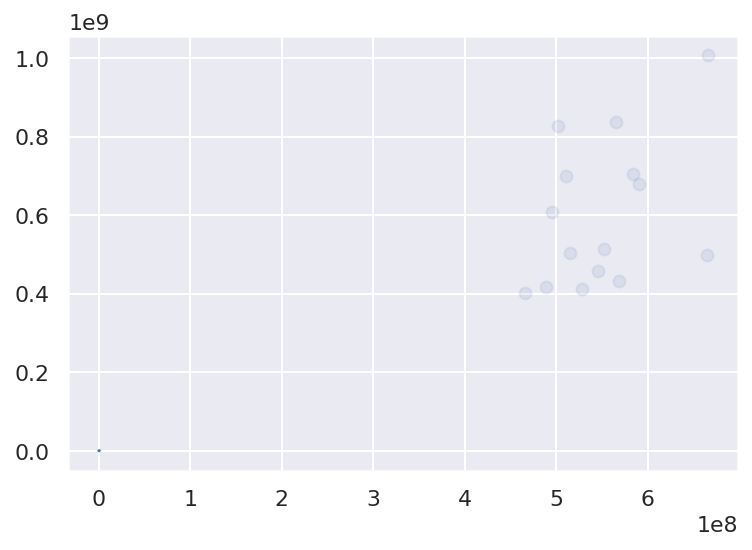

In [426]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [427]:
#r-squared
r2_score(y_test, test_set_pred)

0.07729707337286207

In [428]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

142959188.59443882

## Standard-scaling Features (a must for regularization!)

In [429]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [430]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit_transform(X_train.values)

array([[ 0.27386128,  1.67053888,  0.32169071,  1.94697841,  0.76614894,
         0.17538246, -0.8372094 ,  0.62217102,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.05040771],
       [ 0.27386128,  0.28590414, -0.42600516, -0.93859391, -0.18951727,
        -0.87204056, -0.8372094 , -1.60727513,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.5930249 ],
       [-3.65148372, -0.55326843, -0.97139058, -0.77187196, -0.95599515,
        -0.97678286, -0.8372094 , -1.60727513,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.87731956],
       [ 0.27386128,  0.91528357,  0.22047957,  0.79274948,  0.65298957,
         0.38486706, -0.46986242, -1.60727513,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.05385795],
       [ 0.27386128,  0.70549043, -0.873606  , -0.10498413, -0.20012596,
        -0.24358675, -0.10251544,  0.62217102,  0.        ,  0.        ,
         0.        ,  0.  

In [431]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [432]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

In [433]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array

type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

(array([5., 4., 9., 7., 4., 8., 4., 0., 1., 1.]),
 array([-1.6567808, -1.2130439, -0.769307 , -0.3255701,  0.1181668,
         0.5619037,  1.0056406,  1.4493775,  1.8931144,  2.3368513,
         2.7805882]),
 <a list of 10 Patch objects>)

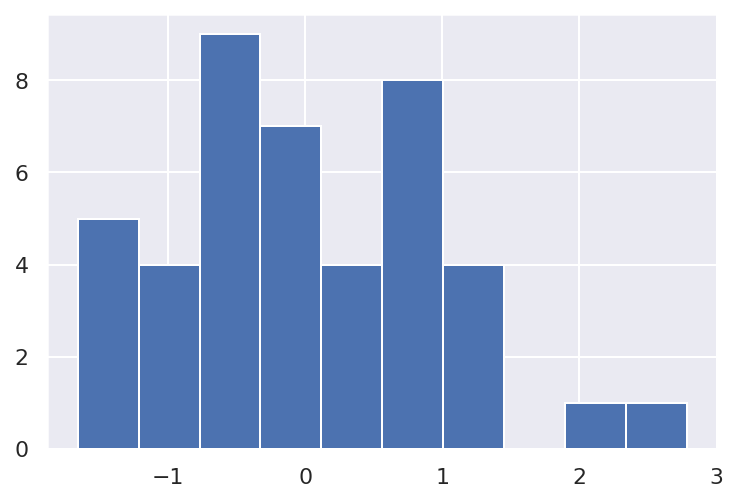

In [457]:
## Here we can plot histograms of the transformed variables

plt.hist(X_tr[:,3])

Now that we have appropriately scaled our variables, we can apply the LASSO as before.

In [436]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [437]:
## Note that now we can meaningful compare the importance of
## different features, since they're on the same scale

## But it's now difficult to interpret the coefficients
## We would need to translate back to the original feature scales by dividing
## each coefficient by the original column's standard deviation

list(zip(X_train.columns, lasso_model.coef_))

[('Franchise', 19193612.01367803),
 ('Running Time', -8411479.621349985),
 ('Opening Weekend', 35503365.22872582),
 ('Production Budget', 11587654.771107145),
 ('Theater counts', -77628.29698198204),
 ('year', -69577189.69274788),
 ('month', 30432197.171925645),
 ('Genre_Adventure', -16694753.063125208),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0),
 ('OW2', 19655964.037322793)]

## Tuning Regularization Strength via Validation

Find the "best" value of the regularization strength alpha for this feature and target set and the LASSO model. 

Decide on a vector of "candidate" alpha values.  Then, for each candidate value, we run the following steps:

> 1. Fit a LASSO model on the training data
> 2. Using the newly trained model, make predictions on the validation data
> 3. Run evaluation metrics on validation

Then we plot how the errors change for the different values of alpha, and see where alpha minimizes our error metric on the validation data. This value of alpha is the one we would select for our final model.

In [440]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

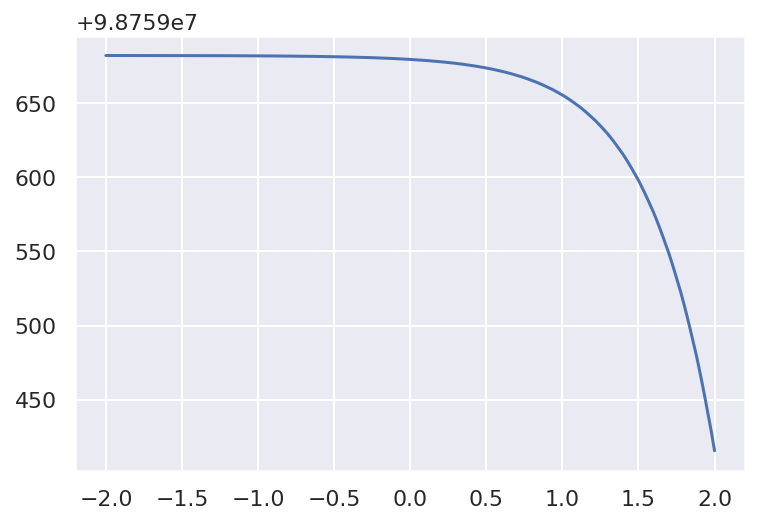

In [441]:
#plot the curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

In [442]:
## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)

98759415.59526934

In [443]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

100.0

## Automated Regularization Strength Tuning via Cross-validation 

### Using LassoCV to find the best alpha via Cross-Validation 

It will do the following for each candidate value of alpha:

> 1. Run cross-validation and score the result
> 2. Find the value of alpha that gave the best CV score
> 3. Fit a final model on all the data using the best value of alpha it just found

Then you can use the `predict` method of the model just as with all of our previous models

In [444]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [445]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [448]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [449]:
# This is the best alpha value it found 
lasso_model.alpha_

100.0

In [450]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Franchise', 19193143.978528745),
 ('Running Time', -8410528.122356292),
 ('Opening Weekend', 35499484.97130609),
 ('Production Budget', 11587036.460524023),
 ('Theater counts', -76883.46892691492),
 ('year', -69575871.51632175),
 ('month', 30431316.9266583),
 ('Genre_Adventure', -16694276.15420987),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0),
 ('OW2', 19658565.532597724)]

In [451]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [452]:
# Find the Mean Absolute Error (MAE) and R^2 on the test set using this model
mae(y_test, test_set_pred)

140279365.3112673

In [137]:
r2_score(y_test, test_set_pred)

0.21214452639315062

---
**Regularization Tuning with CV**: 

Repeating the model selection workflow above (CV), but using the RidgeCV model instead of the LassoCV model. 

---

## Using the LARS Path to Study Feature Importance 

Intuitively, the features that enter the model (nonzero coefficients) earliest in the path are the ones that the model treats as most essential, that it doesn't want to live without.

In [459]:
from sklearn.linear_model import lars_path

In [460]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [461]:
X_tr = std.transform(X_train.values)

In [462]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


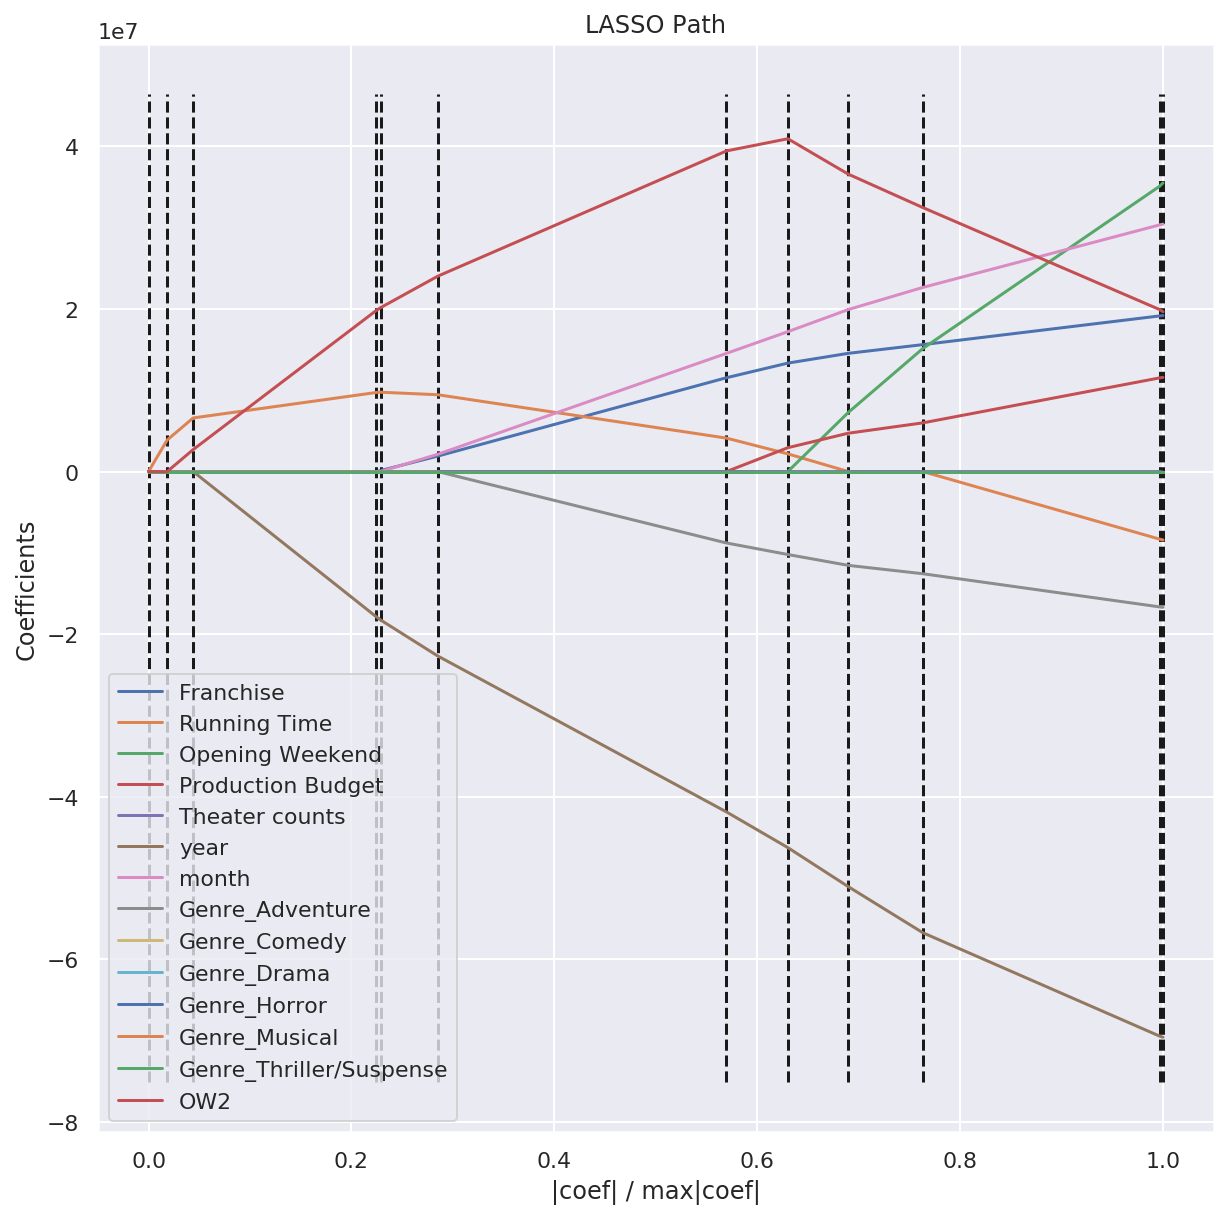

In [469]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()# plotting the LARS path

**Data Exploration Exercises**: 

In [471]:
#Separate our features from our target

#Separate our features from our target
X = play_df_4.drop('Infl. Adj. Dom. BO',axis=1)
y = play_df_4['Infl. Adj. Dom. BO']

In [472]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Star Wars Ep. IV: A New Hope (1977) - Financial Information to Jaws 2 (1978) - Financial Information
Data columns (total 13 columns):
Franchise                  100 non-null int64
Running Time               100 non-null int64
Opening Weekend            100 non-null int64
Production Budget          100 non-null int64
Theater counts             100 non-null int64
year                       100 non-null int64
month                      100 non-null int64
Genre_Adventure            100 non-null uint8
Genre_Comedy               100 non-null uint8
Genre_Drama                100 non-null uint8
Genre_Horror               100 non-null uint8
Genre_Musical              100 non-null uint8
Genre_Thriller/Suspense    100 non-null uint8
dtypes: int64(7), uint8(6)
memory usage: 11.8+ KB


In [473]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [474]:
X_train.columns

Index(['Franchise', 'Running Time', 'Opening Weekend', 'Production Budget', 'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy', 'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense'], dtype='object')

In [475]:
X_train.shape

(60, 13)

In [476]:
X_val.shape

(20, 13)

In [477]:
X_test.shape

(20, 13)

## 2. Exploring the Behavior of LASSO vs. Ridge Regularization

In [478]:
X.columns

Index(['Franchise', 'Running Time', 'Opening Weekend', 'Production Budget', 'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy', 'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense'], dtype='object')

In [479]:
selected_columns = ['Franchise', 'Running Time', 'Opening Weekend',\
                    'Production Budget', 'Theater counts', 'year',\
                    'month', 'Genre_Adventure', 'Genre_Comedy', 'Genre_Drama',\
                    'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense']

In [480]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Beauty and the Beast (2017) - Financial Information to Star Wars Ep. VIII: The Last Jedi (2017) - Financial Information
Data columns (total 13 columns):
Franchise                  60 non-null int64
Running Time               60 non-null int64
Opening Weekend            60 non-null int64
Production Budget          60 non-null int64
Theater counts             60 non-null int64
year                       60 non-null int64
month                      60 non-null int64
Genre_Adventure            60 non-null uint8
Genre_Comedy               60 non-null uint8
Genre_Drama                60 non-null uint8
Genre_Horror               60 non-null uint8
Genre_Musical              60 non-null uint8
Genre_Thriller/Suspense    60 non-null uint8
dtypes: int64(7), uint8(6)
memory usage: 4.1+ KB


In [481]:
lasso_model = Lasso(alpha = 100) 
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [482]:
list(zip(selected_columns, lasso_model.coef_))

[('Franchise', -42259622.85641922),
 ('Running Time', 779966.1853029733),
 ('Opening Weekend', 1.3089818874813055),
 ('Production Budget', 0.6074776815289606),
 ('Theater counts', -12913.87265804815),
 ('year', -10458717.12409037),
 ('month', 6630638.410773729),
 ('Genre_Adventure', -1514189.3395747214),
 ('Genre_Comedy', -18114841.63461463),
 ('Genre_Drama', 241480207.11643472),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 57111965.10118292),
 ('Genre_Thriller/Suspense', 142529827.8325741)]

In [483]:
np.random.seed(6)

X_train_collinear = X_train.loc[:,selected_columns]
# X_train_collinear['Genre_Musical_Clone'] = (X_train_collinear['Genre_Musical'] + 
#                                       2500 * np.random.randn(X_train.shape[0]))

X_train_collinear.corr() #notice .95 correlation b/w Lot Area and its "clone"...nope

,Franchise,Running Time,Opening Weekend,Production Budget,Theater counts,year,month,Genre_Adventure,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Musical,Genre_Thriller/Suspense
Franchise,1.000000,0.052699,0.309487,0.294441,0.355935,0.302689,-0.149234,0.168831,0.059131,-0.484200,NaN,-0.088935,-0.218723
Running Time,0.052699,1.000000,0.422239,0.516999,0.408203,0.286377,-0.094434,-0.076554,-0.355048,0.008086,NaN,-0.150325,0.192040
Opening Weekend,0.309487,0.422239,1.000000,0.851952,0.809673,0.796696,-0.380915,0.043113,-0.364658,-0.205023,NaN,-0.070256,-0.093703
Production Budget,0.294441,0.516999,0.851952,1.000000,0.777310,0.810818,-0.268246,0.147936,-0.469763,-0.246658,NaN,-0.048753,-0.100182
Theater counts,0.355935,0.408203,0.809673,0.777310,1.000000,0.850174,-0.330094,0.179405,-0.429553,-0.247165,NaN,-0.182406,-0.010826
year,0.302689,0.286377,0.796696,0.810818,0.850174,1.000000,-0.179580,0.159985,-0.483503,-0.228615,NaN,0.020783,-0.025941
month,-0.149234,-0.094434,-0.380915,-0.268246,-0.330094,-0.179580,1.000000,0.270054,0.232183,-0.070565,NaN,-0.070565,0.018613
Genre_Adventure,0.168831,-0.076554,0.043113,0.147936,0.179405,0.159985,0.270054,1.000000,-0.354787,-0.207514,NaN,-0.207514,-0.241747
Genre_Comedy,0.059131,-0.355048,-0.364658,-0.469763,-0.429553,-0.483503,0.232183,-0.354787,1.000000,-0.089984,NaN,-0.089984,-0.104828
Genre_Drama,-0.484200,0.008086,-0.205023,-0.246658,-0.247165,-0.228615,-0.070565,-0.207514,-0.089984,1.000000,NaN,-0.052632,-0.061314


As a quick aside, let's understand what happens with p-values when there is a lot of collinearity! We are much less sure about our relationships being meaningful. In this case the model does detect the right variable as having a significant relationship, but this need not be the case in general.

In [484]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Infl. Adj. Dom. BO   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     2.949
Date:                Sun, 26 Jan 2020   Prob (F-statistic):            0.00395
Time:                        13:56:15   Log-Likelihood:                -1205.2
No. Observations:                  60   AIC:                             2436.
Df Residuals:                      47   BIC:                             2464.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     2.12e+10      8e+09      2.651      0.011    5.11e+09    3.73e+10
Franchise               -4.226e+07   6.24e+07     -0.677      0.502   -1.68e+08    8.33e+07
Running Time             7.799e+05   1.19e+06      0.656      0.515   -1.61e+06    3.17e+06
Opening Weekend             1.3090      0.563      2.327      0.024       0.177       2.441
Production Budget           0.6075      0.520      1.167      0.249      -0.440       1.655
Theater counts          -1.291e+04   3.11e+04     -0.415      0.680   -7.55e+04    4.96e+04
year                    -1.046e+07   4.02e+06     -2.600      0.012   -1.86e+07   -2.37e+06
month                    6.631e+06   9.18e+06      0.723      0.473   -1.18e+07    2.51e+07
Genre_Adventure         -1.515e+06   5.62e+07     -0.027      0.979   -1.15e+08    1.12e+08
Genre_Comedy            -1.812e+07   8.92e+07     -0.203      0.840   -1.98e+08    1.61e+08
Genre_Drama              2.415e+08   1.13e+08      2.134      0.038    1.38e+07    4.69e+08
Genre_Horror             1.366e-08   4.03e-08      0.339      0.736   -6.75e-08    9.48e-08
Genre_Musical            5.712e+07   1.03e+08      0.556      0.581   -1.49e+08    2.64e+08
Genre_Thriller/Suspense  1.425e+08   9.12e+07      1.563      0.125    -4.1e+07    3.26e+08
==============================================================================
Omnibus:                       16.166   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.585
Skew:                           0.962   Prob(JB):                     7.56e-06
Kurtosis:                       5.394   Cond. No.                     5.70e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.5e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now let's compare and contrast Ridge vs. Lasso

In [485]:
lr_model_ridge = Ridge(alpha = 100)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('Franchise', -8660673.961342715),
 ('Running Time', 2104890.483914722),
 ('Opening Weekend', 1.160898272957104),
 ('Production Budget', 0.17450114662416666),
 ('Theater counts', -37345.12751004213),
 ('year', -6860970.59669233),
 ('month', 167263.0562668842),
 ('Genre_Adventure', -2614665.5694524827),
 ('Genre_Comedy', -3204404.3407290303),
 ('Genre_Drama', 5678814.018492983),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 264694.70544183766),
 ('Genre_Thriller/Suspense', 3642016.7919661263)]

In [486]:
lr_model_lasso = Lasso(alpha = 100)
lr_model_lasso.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_lasso.coef_))

[('Franchise', -42259622.85641922),
 ('Running Time', 779966.1853029733),
 ('Opening Weekend', 1.3089818874813055),
 ('Production Budget', 0.6074776815289606),
 ('Theater counts', -12913.87265804815),
 ('year', -10458717.12409037),
 ('month', 6630638.410773729),
 ('Genre_Adventure', -1514189.3395747214),
 ('Genre_Comedy', -18114841.63461463),
 ('Genre_Drama', 241480207.11643472),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 57111965.10118292),
 ('Genre_Thriller/Suspense', 142529827.8325741)]

In [487]:
#Back to the original LASSO model: diagnostics

In [488]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

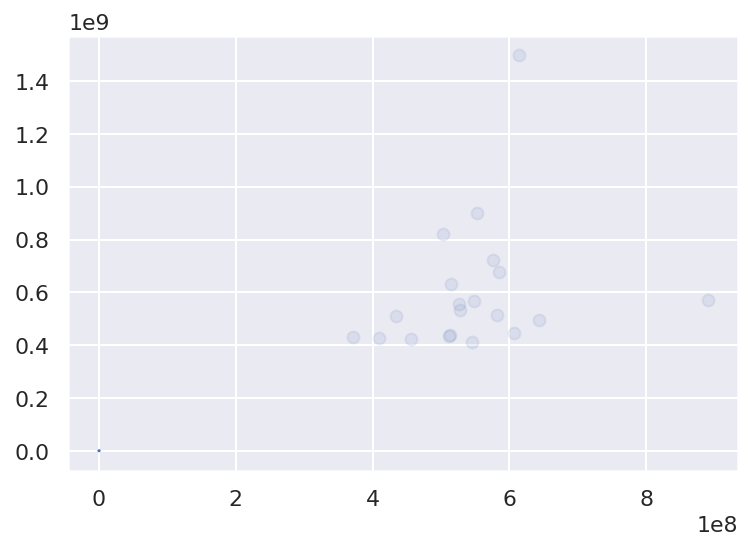

In [489]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [490]:
#r-squared
r2_score(y_test, test_set_pred)

-0.033572400415396775

In [491]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

156750686.31842765

## 3. Standard-scaling Features (a must for regularization!)

In [492]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [493]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit_transform(X_train.values)

array([[-2.11057941, -0.16615098,  1.17043164,  0.40663427,  0.87667748,
         1.20357722, -1.58434674, -0.90453403, -0.39223227, -0.22941573,
         0.        ,  4.35889894, -0.26726124],
       [ 0.47380354,  0.00647341,  0.04320402,  0.85966659,  0.83818499,
         0.19412536, -0.53972252,  1.1055416 , -0.39223227, -0.22941573,
         0.        , -0.22941573, -0.26726124],
       [ 0.47380354, -1.33136564, -1.08185985, -1.40549504, -1.58684176,
        -1.90242851, -0.88793059, -0.90453403,  2.54950976, -0.22941573,
         0.        , -0.22941573, -0.26726124],
       [ 0.47380354,  0.5243466 ,  0.30719042, -0.1030271 ,  0.51232617,
         0.2717755 , -0.88793059,  1.1055416 , -0.39223227, -0.22941573,
         0.        , -0.22941573, -0.26726124],
       [ 0.47380354,  1.17168808,  0.16942834,  0.80303755,  0.79571052,
         0.73767636, -0.53972252, -0.90453403, -0.39223227, -0.22941573,
         0.        , -0.22941573, -0.26726124],
       [ 0.47380354, -0.381931

In [494]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [495]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

In [496]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

(array([14.,  6., 11.,  9.,  5.,  9.,  3.,  2.,  0.,  1.]),
 array([-1.40549504, -0.95246271, -0.49943039, -0.04639806,  0.40663427,
         0.85966659,  1.31269892,  1.76573124,  2.21876357,  2.6717959 ,
         3.12482822]),
 <a list of 10 Patch objects>)

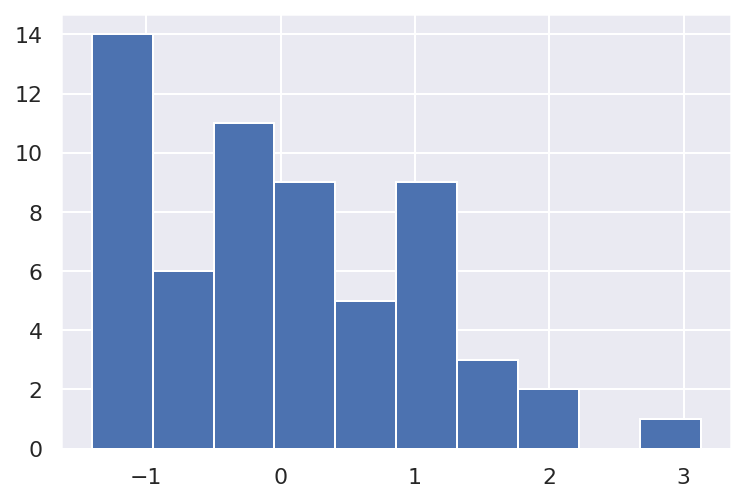

In [497]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

plt.hist(X_tr[:,3])

Now that we have appropriately scaled our variables, we can apply the LASSO as before.

What we did before was technically not good practice since the variables were on different scales.  Certain variables would be (unfairly) penalized more than others.

In [498]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [499]:
## Note that now we can meaningful compare the importance of
## different features, since they're on the same scale

## But it's now difficult to interpret the coefficients
## We would need to translate back to the original feature scales by dividing
## each coefficient by the original column's standard deviation

list(zip(X_train.columns, lasso_model.coef_))

[('Franchise', -16364621.480778234),
 ('Running Time', 18103624.27820428),
 ('Opening Weekend', 100493879.13007922),
 ('Production Budget', 53579052.677000634),
 ('Theater counts', -19464843.28631321),
 ('year', -134582231.4343174),
 ('month', 18994491.171035368),
 ('Genre_Adventure', -729468.6116892971),
 ('Genre_Comedy', -6122347.619204627),
 ('Genre_Drama', 52612347.70895913),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 12433264.844586376),
 ('Genre_Thriller/Suspense', 35534488.48620631)]

## 4. Tuning Regularization Strength via Validation

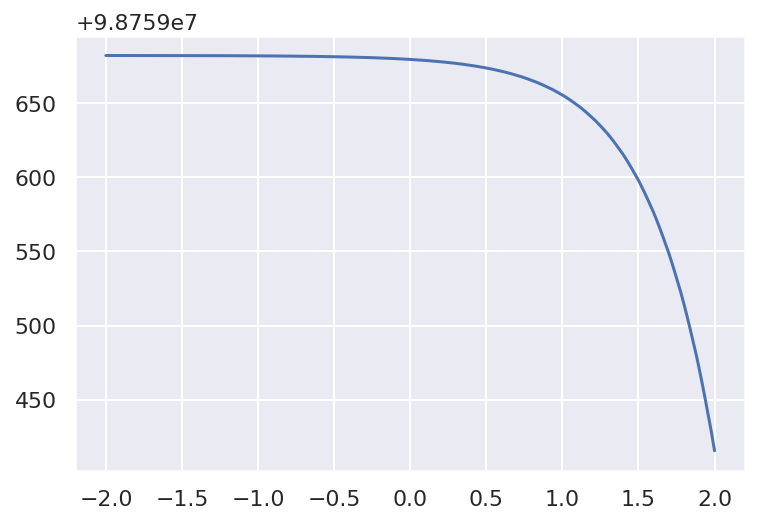

In [500]:
#plot the curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

In [501]:
## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)

98759415.59526934

In [502]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

100.0

## 5. Automated Regularization Strength Tuning via Cross-validation 

### Using LassoCV to find the best alpha via Cross-Validation

In [503]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [504]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [505]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [506]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

100.0

In [507]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Franchise', -16351760.66487947),
 ('Running Time', 18072883.96190356),
 ('Opening Weekend', 100556503.50393273),
 ('Production Budget', 53636614.40234733),
 ('Theater counts', -19457541.242679805),
 ('year', -134690480.5507792),
 ('month', 19042290.439853173),
 ('Genre_Adventure', -753234.3479190291),
 ('Genre_Comedy', -6157844.993123781),
 ('Genre_Drama', 52630015.03595414),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 12447830.426872754),
 ('Genre_Thriller/Suspense', 35553630.765967175)]

In [508]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [509]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

156750839.35436884

In [510]:
r2_score(y_test, test_set_pred)

-0.03357549923718506



## 6. Using the LARS Path to Study Feature Importance 

In [511]:
from sklearn.linear_model import lars_path

In [512]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [513]:
X_tr = std.transform(X_train.values)

In [514]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


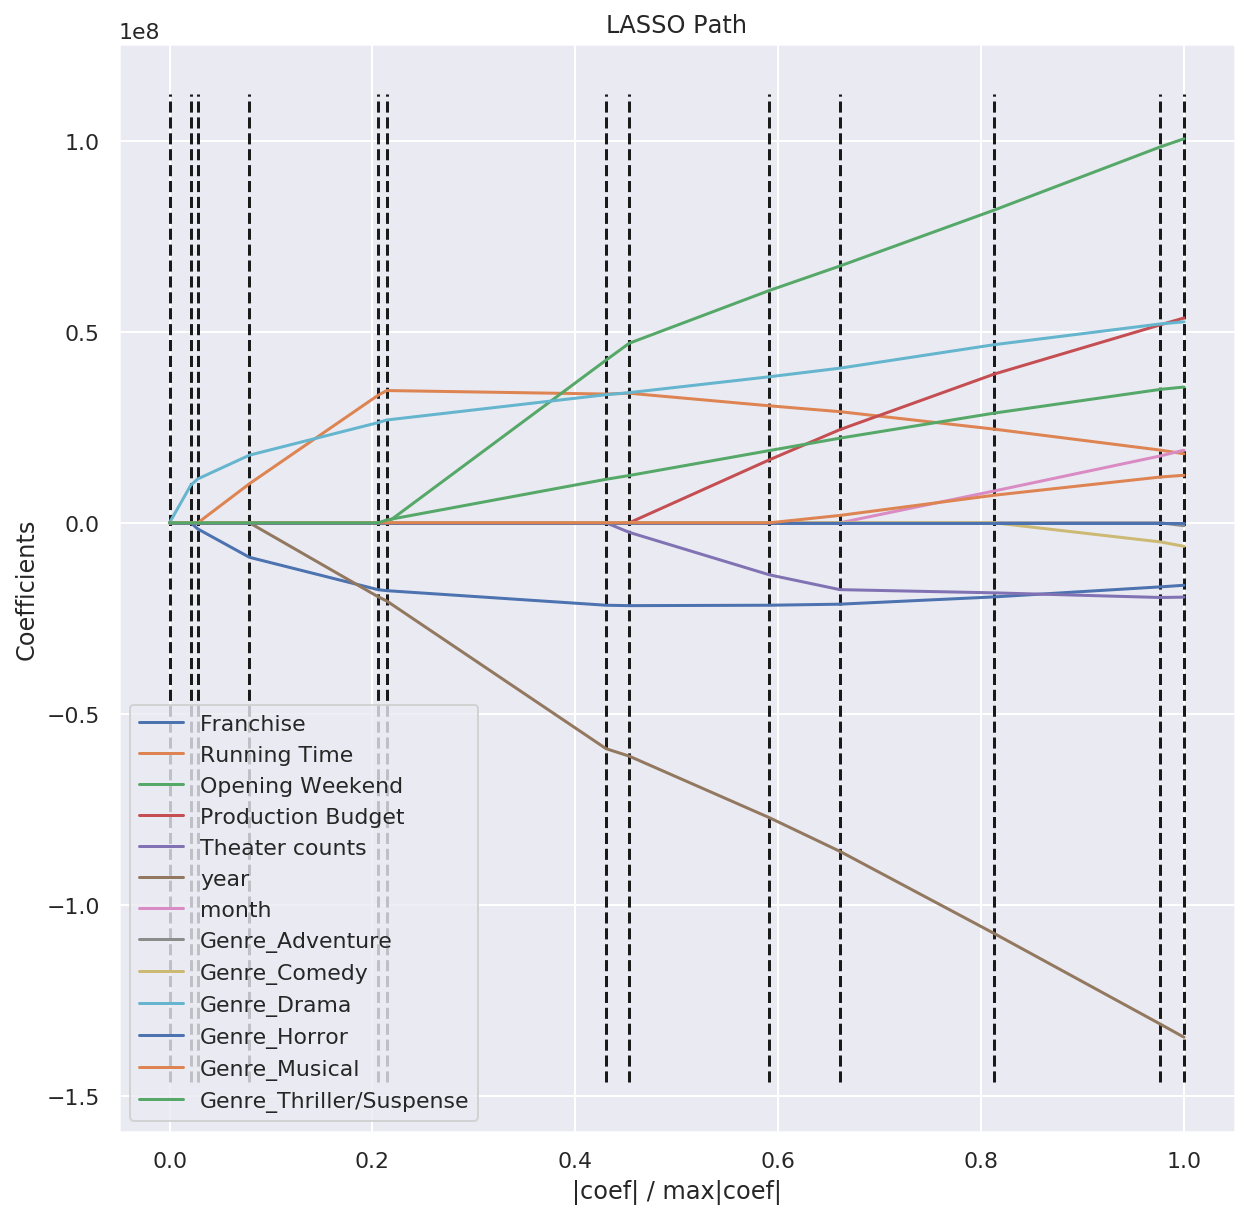

<Figure size 432x288 with 0 Axes>

In [515]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

plt.savefig('LASSO_path.svg')

In [522]:
#Separate our features from our target

X = play_df_5.drop('Infl. Adj. Dom. BO',axis=1)
y = play_df_5['Infl. Adj. Dom. BO']

X['RT_x_OW'] = X2['Running Time'] * X2['Opening Weekend']
X['RT_x_TC'] = X2['Running Time'] * X2['Theater counts']

In [523]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, Star Wars Ep. VII: The Force Awakens (2015) - Financial Information to Indiana Jones and the Kingdom of the Crystal Skull (2008) - Financial Information
Data columns (total 15 columns):
Franchise                  73 non-null int64
Running Time               73 non-null int64
Opening Weekend            73 non-null int64
Production Budget          73 non-null int64
Theater counts             73 non-null int64
year                       73 non-null int64
month                      73 non-null int64
Genre_Adventure            73 non-null uint8
Genre_Comedy               73 non-null uint8
Genre_Drama                73 non-null uint8
Genre_Horror               73 non-null uint8
Genre_Musical              73 non-null uint8
Genre_Thriller/Suspense    73 non-null uint8
RT_x_OW                    73 non-null int64
RT_x_TC                    73 non-null int64
dtypes: int64(9), uint8(6)
memory usage: 8.6+ KB


In [524]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [525]:
X_train.columns

Index(['Franchise', 'Running Time', 'Opening Weekend', 'Production Budget', 'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy', 'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense', 'RT_x_OW', 'RT_x_TC'], dtype='object')

## 2. Exploring the Behavior of LASSO vs. Ridge Regularization


In [526]:
selected_columns = ['Franchise', 'Running Time', 'Opening Weekend', 'Production Budget',\
                    'Theater counts', 'year', 'month', 'Genre_Adventure', 'Genre_Comedy',\
                    'Genre_Drama', 'Genre_Horror', 'Genre_Musical', 'Genre_Thriller/Suspense',\
                    'RT_x_OW', 'RT_x_TC']

In [527]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, Pirates of the Caribbean: At Worldâs End (2007) - Financial Information to Star Wars Ep. II: Attack of the Clones (2002) - Financial Information
Data columns (total 15 columns):
Franchise                  43 non-null int64
Running Time               43 non-null int64
Opening Weekend            43 non-null int64
Production Budget          43 non-null int64
Theater counts             43 non-null int64
year                       43 non-null int64
month                      43 non-null int64
Genre_Adventure            43 non-null uint8
Genre_Comedy               43 non-null uint8
Genre_Drama                43 non-null uint8
Genre_Horror               43 non-null uint8
Genre_Musical              43 non-null uint8
Genre_Thriller/Suspense    43 non-null uint8
RT_x_OW                    43 non-null int64
RT_x_TC                    43 non-null int64
dtypes: int64(9), uint8(6)
memory usage: 3.6+ KB


In [528]:
lasso_model = Lasso(alpha = 1000000) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=1000000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [529]:
list(zip(selected_columns, lasso_model.coef_))

[('Franchise', 21462606.72263631),
 ('Running Time', 6525866.322520368),
 ('Opening Weekend', 0.021238048640881406),
 ('Production Budget', 0.26335500927789196),
 ('Theater counts', 179628.18282353575),
 ('year', -4263815.067178191),
 ('month', 8817087.67651847),
 ('Genre_Adventure', -12593903.554910386),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0),
 ('RT_x_OW', 0.009076439488150992),
 ('RT_x_TC', -1967.229877255551)]

In [531]:
np.random.seed(6)

X_train_collinear = X_train.loc[:,selected_columns]

X_train_collinear.corr() #notice 1.0 correlation b/w Genre_Musical and its "clone"

,Franchise,Running Time,Opening Weekend,Production Budget,Theater counts,year,month,Genre_Adventure,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Musical,Genre_Thriller/Suspense,RT_x_OW,RT_x_TC
Franchise,1.000000,0.277918,0.307847,0.240654,0.398925,0.267503,-0.173129,0.033131,NaN,NaN,NaN,NaN,NaN,0.304549,0.399490
Running Time,0.277918,1.000000,0.328871,0.438103,0.319079,0.125447,0.168747,-0.336689,NaN,NaN,NaN,NaN,NaN,0.541458,0.740481
Opening Weekend,0.307847,0.328871,1.000000,0.779145,0.788151,0.778616,-0.099588,-0.205722,NaN,NaN,NaN,NaN,NaN,0.961543,0.755472
Production Budget,0.240654,0.438103,0.779145,1.000000,0.668650,0.685655,-0.128979,-0.287761,NaN,NaN,NaN,NaN,NaN,0.790057,0.733708
Theater counts,0.398925,0.319079,0.788151,0.668650,1.000000,0.796512,-0.152261,-0.130704,NaN,NaN,NaN,NaN,NaN,0.717120,0.863493
year,0.267503,0.125447,0.778616,0.685655,0.796512,1.000000,0.119988,-0.098257,NaN,NaN,NaN,NaN,NaN,0.691282,0.657672
month,-0.173129,0.168747,-0.099588,-0.128979,-0.152261,0.119988,1.000000,0.292335,NaN,NaN,NaN,NaN,NaN,-0.021625,0.003528
Genre_Adventure,0.033131,-0.336689,-0.205722,-0.287761,-0.130704,-0.098257,0.292335,1.000000,NaN,NaN,NaN,NaN,NaN,-0.272687,-0.265056
Genre_Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre_Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [532]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Infl. Adj. Dom. BO   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.8456
Date:                Sun, 26 Jan 2020   Prob (F-statistic):              0.590
Time:                        14:19:00   Log-Likelihood:                -853.34
No. Observations:                  43   AIC:                             1729.
Df Residuals:                      32   BIC:                             1748.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    9.742e+09   1.05e+10      0.924      0.362   -1.17e+10    3.12e+10
Franchise                 4.94e+07   8.54e+07      0.578      0.567   -1.25e+08    2.23e+08
Running Time             5.951e+06   4.86e+06      1.225      0.230   -3.95e+06    1.59e+07
Opening Weekend            -0.0710      4.178     -0.017      0.987      -8.581       8.439
Production Budget           0.2891      0.452      0.640      0.527      -0.631       1.209
Theater counts           1.756e+05   1.74e+05      1.011      0.320   -1.78e+05    5.29e+05
year                    -4.991e+06   5.21e+06     -0.957      0.346   -1.56e+07    5.63e+06
month                    1.085e+07   1.02e+07      1.066      0.294   -9.88e+06    3.16e+07
Genre_Adventure         -2.545e+07   5.09e+07     -0.500      0.620   -1.29e+08    7.82e+07
Genre_Comedy            -4.713e-09   1.48e-08     -0.318      0.753   -3.49e-08    2.55e-08
Genre_Drama                      0          0        nan        nan           0           0
Genre_Horror                     0          0        nan        nan           0           0
Genre_Musical                    0          0        nan        nan           0           0
Genre_Thriller/Suspense          0          0        nan        nan           0           0
RT_x_OW                     0.0097      0.030      0.324      0.748      -0.051       0.070
RT_x_TC                 -1893.6908   1614.561     -1.173      0.249   -5182.444    1395.062
==============================================================================
Omnibus:                       15.534   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.013
Skew:                           1.260   Prob(JB):                     0.000123
Kurtosis:                       4.924   Cond. No.                     1.19e+61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.99e-101. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [533]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('Franchise', 8.447262573095254e-05),
 ('Running Time', 0.003827210323222751),
 ('Opening Weekend', -0.9838599252092126),
 ('Production Budget', -0.15774102825123307),
 ('Theater counts', -0.41725049727980434),
 ('year', -0.0058884948920268805),
 ('month', 0.0001616166369838178),
 ('Genre_Adventure', -0.00010558429981709513),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0),
 ('RT_x_OW', 0.010700140330846765),
 ('RT_x_TC', -51.44985246664128)]

In [534]:
lr_model_lasso = Lasso(alpha = 100000)
lr_model_lasso.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_lasso.coef_))

[('Franchise', 46744021.08243945),
 ('Running Time', 5948041.792334543),
 ('Opening Weekend', 0.12458430139929387),
 ('Production Budget', 0.2835554190450194),
 ('Theater counts', 170276.9591549349),
 ('year', -4977689.547361453),
 ('month', 10695683.108831793),
 ('Genre_Adventure', -24488840.582139686),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0),
 ('RT_x_OW', 0.00827709907695115),
 ('RT_x_TC', -1853.535420579742)]

In [535]:
#Back to the original LASSO model: diagnostics

In [536]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

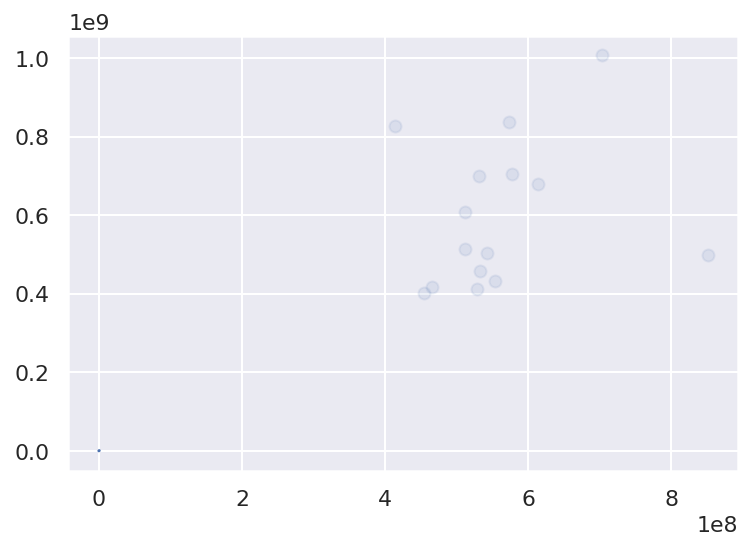

In [537]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [538]:
#r-squared
r2_score(y_test, test_set_pred)

-0.14997185165490312

In [539]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

149527415.18349805

In [540]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [541]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit_transform(X_train.values)

array([[ 0.27386128,  1.67053888,  0.32169071,  1.94697841,  0.76614894,
         0.17538246, -0.8372094 ,  0.62217102,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.78097032,  1.59400388],
       [ 0.27386128,  0.28590414, -0.42600516, -0.93859391, -0.18951727,
        -0.87204056, -0.8372094 , -1.60727513,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.36819373, -0.07822954],
       [-3.65148372, -0.55326843, -0.97139058, -0.77187196, -0.95599515,
        -0.97678286, -0.8372094 , -1.60727513,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.97154873, -1.03048772],
       [ 0.27386128,  0.91528357,  0.22047957,  0.79274948,  0.65298957,
         0.38486706, -0.46986242, -1.60727513,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.42701954,  1.02894185],
       [ 0.27386128,  0.70549043, -0.873606  , -0.10498413, -0.20012596,
        -0.24358675, -0.10251544,  0.62217102, 

In [542]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [543]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

In [544]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

(array([5., 4., 9., 7., 4., 8., 4., 0., 1., 1.]),
 array([-1.6567808, -1.2130439, -0.769307 , -0.3255701,  0.1181668,
         0.5619037,  1.0056406,  1.4493775,  1.8931144,  2.3368513,
         2.7805882]),
 <a list of 10 Patch objects>)

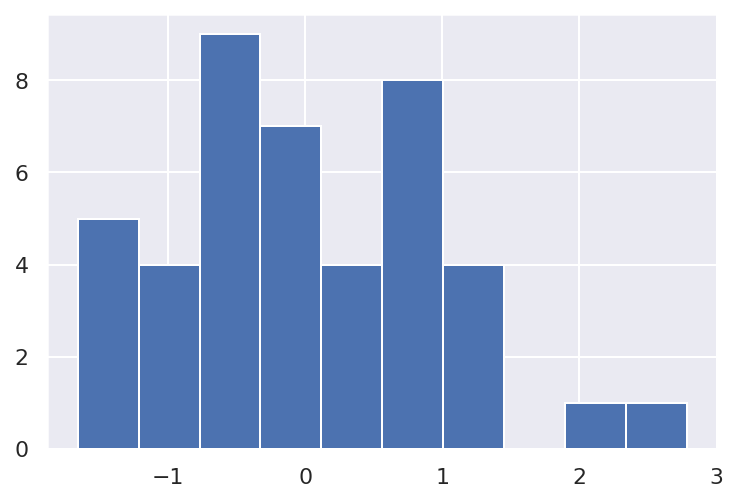

In [545]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

plt.hist(X_tr[:,3])

In [546]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [547]:
## Note that now we can meaningful compare the importance of
## different features, since they're on the same scale

## But it's now difficult to interpret the coefficients
## We would need to translate back to the original feature scales by dividing
## each coefficient by the original column's standard deviation

list(zip(X_train.columns, lasso_model.coef_))

[('Franchise', 12673248.857940009),
 ('Running Time', 138538061.51200327),
 ('Opening Weekend', 9800611.547138352),
 ('Production Budget', 22073093.80029359),
 ('Theater counts', 188314450.7844702),
 ('year', -48408082.139345095),
 ('month', 29630378.666072108),
 ('Genre_Adventure', -11614845.116848094),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0),
 ('RT_x_OW', 65337958.60144816),
 ('RT_x_TC', -313407920.2046852)]

In [548]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

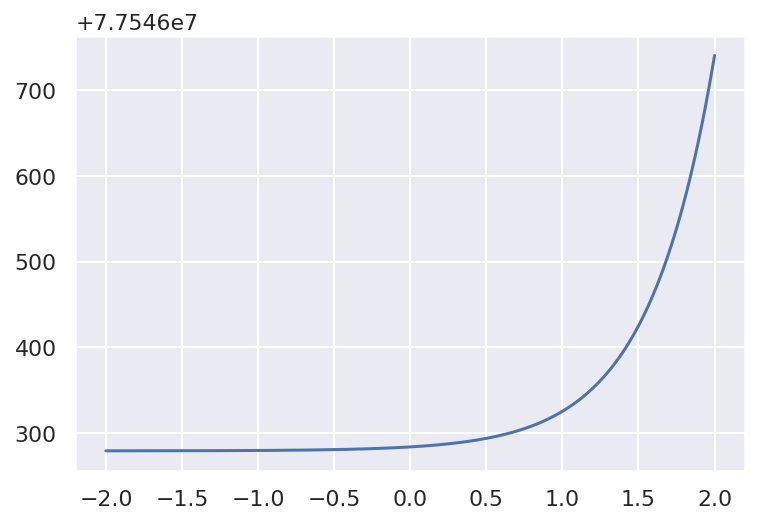

In [549]:
#plot the curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

In [550]:
## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)

77546279.18563406

In [551]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

0.01

## 5. Automated Regularization Strength Tuning via Cross-validation 


In [552]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [553]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [554]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [555]:
# This is the best alpha value it found 
lasso_model.alpha_

100.0

In [556]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Franchise', 12624368.978630448),
 ('Running Time', 140212639.29275844),
 ('Opening Weekend', 7772803.136037153),
 ('Production Budget', 22282883.656534806),
 ('Theater counts', 191402052.4183896),
 ('year', -48281752.64158233),
 ('month', 29683699.96285415),
 ('Genre_Adventure', -11577466.631884957),
 ('Genre_Comedy', 0.0),
 ('Genre_Drama', 0.0),
 ('Genre_Horror', 0.0),
 ('Genre_Musical', 0.0),
 ('Genre_Thriller/Suspense', 0.0),
 ('RT_x_OW', 67629956.6947675),
 ('RT_x_TC', -317884593.8704549)]

In [557]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [558]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

150097447.22509813

In [559]:
r2_score(y_test, test_set_pred)

-0.1346640743434664

## 6. Using the LARS Path to Study Feature Importance 


In [560]:
from sklearn.linear_model import lars_path

In [561]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [562]:
X_tr = std.transform(X_train.values)

In [563]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


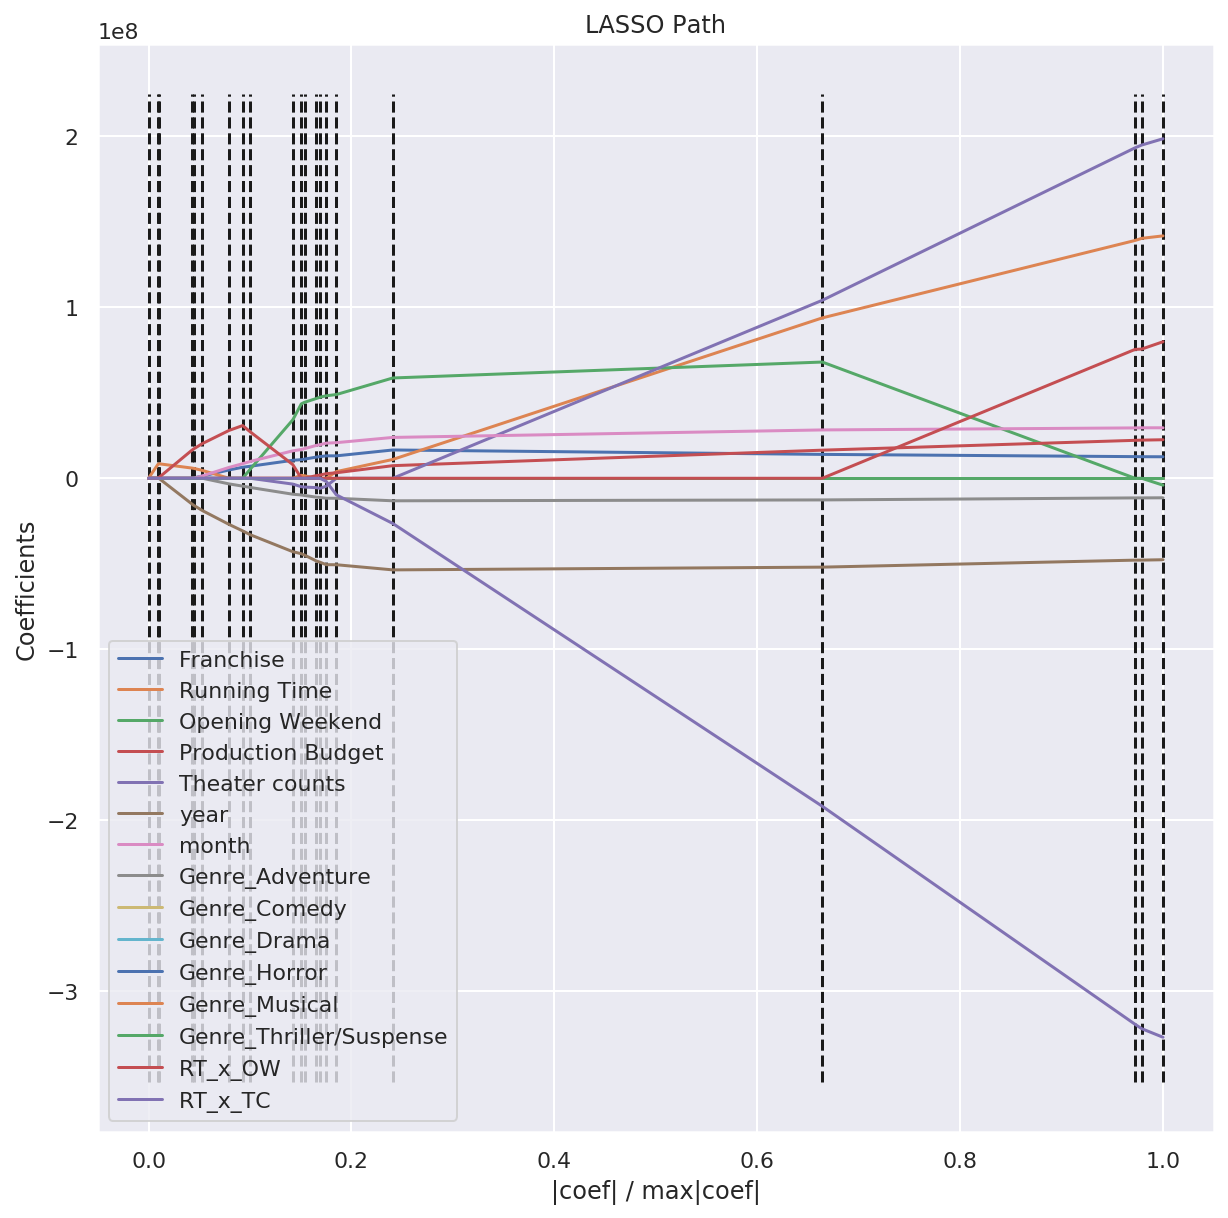

In [564]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()